# Unsupervised Learning Model

## Preparation of the dataset

In [4]:
import sklearn
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

dataset = pd.read_csv('data/export_MarginalPriceDayAheadMarket_2024-10-11_17_28.csv',delimiter=';')

In [5]:
dataset.shape

(17568, 6)

In [6]:
dataset.head()

id                                   name  geoid geoname   value  \
0  600  Marginal price Day Ahead market Spain      3   Spain  200.00   
1  600  Marginal price Day Ahead market Spain      3   Spain  181.99   
2  600  Marginal price Day Ahead market Spain      3   Spain  178.54   
3  600  Marginal price Day Ahead market Spain      3   Spain  178.54   
4  600  Marginal price Day Ahead market Spain      3   Spain  181.23   

                    datetime  
0  2022-09-01T00:00:00+02:00  
1  2022-09-01T01:00:00+02:00  
2  2022-09-01T02:00:00+02:00  
3  2022-09-01T03:00:00+02:00  
4  2022-09-01T04:00:00+02:00

In [7]:
dataset.dtypes

id            int64
name         object
geoid         int64
geoname      object
value       float64
datetime     object
dtype: object

In [8]:
dataset.isna().sum()

id          0
name        0
geoid       0
geoname     0
value       0
datetime    0
dtype: int64

In [9]:
dataset.describe()

id    geoid         value
count  17568.0  17568.0  17568.000000
mean     600.0      3.0     80.230867
std        0.0      0.0     49.393266
min      600.0      3.0     -2.000000
25%      600.0      3.0     40.845000
50%      600.0      3.0     86.045000
75%      600.0      3.0    114.192500
max      600.0      3.0    300.000000

In [10]:
# Convertir la columna 'datetime' al formato de fecha y hora si no es ya datetime
if not pd.api.types.is_datetime64_any_dtype(dataset['datetime']):
    dataset['datetime'] = pd.to_datetime(
        dataset['datetime'].str.replace(r'\+.*', '', regex=True),
        errors='coerce'
    )

# Crear columnas para año, mes, día, hora y día semana
dataset['year'] = dataset['datetime'].dt.year
dataset['month'] = dataset['datetime'].dt.month
dataset.loc[:,'day_of_week'] = dataset['datetime'].dt.weekday
dataset.loc[:,'hour'] = dataset['datetime'].dt.hour
dataset.loc[:,'is_weekend'] = dataset['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)

# Visualizar los primeros datos
dataset.head()

id                                   name  geoid geoname   value  \
0  600  Marginal price Day Ahead market Spain      3   Spain  200.00   
1  600  Marginal price Day Ahead market Spain      3   Spain  181.99   
2  600  Marginal price Day Ahead market Spain      3   Spain  178.54   
3  600  Marginal price Day Ahead market Spain      3   Spain  178.54   
4  600  Marginal price Day Ahead market Spain      3   Spain  181.23   

             datetime  year  month  day_of_week  hour  is_weekend  
0 2022-09-01 00:00:00  2022      9            3     0           0  
1 2022-09-01 01:00:00  2022      9            3     1           0  
2 2022-09-01 02:00:00  2022      9            3     2           0  
3 2022-09-01 03:00:00  2022      9            3     3           0  
4 2022-09-01 04:00:00  2022      9            3     4           0

In [11]:
dataset = dataset.drop(columns=['id', 'name', 'geoid', 'geoname'])

In [12]:
dataset = dataset.rename(columns={'value':'Price [€/MWh]'})
dataset

Price [€/MWh]            datetime  year  month  day_of_week  hour  \
0             200.00 2022-09-01 00:00:00  2022      9            3     0   
1             181.99 2022-09-01 01:00:00  2022      9            3     1   
2             178.54 2022-09-01 02:00:00  2022      9            3     2   
3             178.54 2022-09-01 03:00:00  2022      9            3     3   
4             181.23 2022-09-01 04:00:00  2022      9            3     4   
...              ...                 ...   ...    ...          ...   ...   
17563         123.60 2024-09-01 19:00:00  2024      9            6    19   
17564         134.02 2024-09-01 20:00:00  2024      9            6    20   
17565         141.74 2024-09-01 21:00:00  2024      9            6    21   
17566         139.70 2024-09-01 22:00:00  2024      9            6    22   
17567         129.10 2024-09-01 23:00:00  2024      9            6    23   

       is_weekend  
0               0  
1               0  
2               0  
3               0  
4               0  
...           ...  
17563           1  
17564           1  
17565           1  
17566           1  
17567           1  

[17568 rows x 7 columns]

In [13]:
dataset_extra = pd.read_excel('data/Extra_data.xlsx')
dataset_extra

Demand [MWh]  Wind Generation [MWh]  Solar Generation [MWh]  \
0           26178.5                 3662.0                     0.0   
1           24900.8                 3427.5                     0.0   
2           23936.3                 3087.0                     0.0   
3           23387.3                 2795.3                     0.0   
4           23163.3                 2471.3                     0.0   
...             ...                    ...                     ...   
17563       26977.0                 2544.8                  5214.1   
17564       28061.5                 2766.8                   845.1   
17565       29480.5                 3083.8                     0.2   
17566       28248.8                 3484.3                     0.0   
17567       26408.8                 3724.8                     0.0   

       Solar Thermal Generation [MW]  Natural Gas Price [€/MWh]  \
0                            340.525                     215.96   
1                            268.250                     215.96   
2                            247.925                     215.96   
3                            206.025                     215.96   
4                            213.900                     215.96   
...                              ...                        ...   
17563                        861.375                      39.88   
17564                        547.300                      39.88   
17565                        476.650                      39.88   
17566                        431.975                      39.88   
17567                        431.975                      39.88   

       Import Portugal [MW]  Import Morroco [MW]  Import France [MW]  \
0                    3169.0                600.0              3098.0   
1                    3735.0                600.0              3098.0   
2                    3735.0                600.0              3098.0   
3                    3735.0                600.0              3098.0   
4                    3330.0                600.0              3098.0   
...                     ...                  ...                 ...   
17563                   NaN                  NaN                 NaN   
17564                   NaN                  NaN                 NaN   
17565                   NaN                  NaN                 NaN   
17566                   NaN                  NaN                 NaN   
17567                   NaN                  NaN                 NaN   

       Export Portugal [MW]  Export Morroco [MW]  Export France [MW]  
0                    4320.0                900.0              2960.0  
1                    4320.0                900.0              2960.0  
2                    4320.0                900.0              2960.0  
3                    4320.0                900.0              2960.0  
4                    4860.0                900.0              3145.0  
...                     ...                  ...                 ...  
17563                   NaN                  NaN                 NaN  
17564                   NaN                  NaN                 NaN  
17565                   NaN                  NaN                 NaN  
17566                   NaN                  NaN                 NaN  
17567                   NaN                  NaN                 NaN  

[17568 rows x 11 columns]

In [14]:
# Seleccionar las primeras 5 columnas de dataset_extra
first_5_columns = dataset_extra.iloc[:, :5]  # Selecciona columnas por posición (las primeras 5)

# Añadirlas a dataset
dataset = pd.concat([dataset, first_5_columns], axis=1)  # Concatenar por columnas (axis=1)
dataset

Price [€/MWh]            datetime  year  month  day_of_week  hour  \
0             200.00 2022-09-01 00:00:00  2022      9            3     0   
1             181.99 2022-09-01 01:00:00  2022      9            3     1   
2             178.54 2022-09-01 02:00:00  2022      9            3     2   
3             178.54 2022-09-01 03:00:00  2022      9            3     3   
4             181.23 2022-09-01 04:00:00  2022      9            3     4   
...              ...                 ...   ...    ...          ...   ...   
17563         123.60 2024-09-01 19:00:00  2024      9            6    19   
17564         134.02 2024-09-01 20:00:00  2024      9            6    20   
17565         141.74 2024-09-01 21:00:00  2024      9            6    21   
17566         139.70 2024-09-01 22:00:00  2024      9            6    22   
17567         129.10 2024-09-01 23:00:00  2024      9            6    23   

       is_weekend  Demand [MWh]  Wind Generation [MWh]  \
0               0       26178.5                 3662.0   
1               0       24900.8                 3427.5   
2               0       23936.3                 3087.0   
3               0       23387.3                 2795.3   
4               0       23163.3                 2471.3   
...           ...           ...                    ...   
17563           1       26977.0                 2544.8   
17564           1       28061.5                 2766.8   
17565           1       29480.5                 3083.8   
17566           1       28248.8                 3484.3   
17567           1       26408.8                 3724.8   

       Solar Generation [MWh]  Solar Thermal Generation [MW]  \
0                         0.0                        340.525   
1                         0.0                        268.250   
2                         0.0                        247.925   
3                         0.0                        206.025   
4                         0.0                        213.900   
...                       ...                            ...   
17563                  5214.1                        861.375   
17564                   845.1                        547.300   
17565                     0.2                        476.650   
17566                     0.0                        431.975   
17567                     0.0                        431.975   

       Natural Gas Price [€/MWh]  
0                         215.96  
1                         215.96  
2                         215.96  
3                         215.96  
4                         215.96  
...                          ...  
17563                      39.88  
17564                      39.88  
17565                      39.88  
17566                      39.88  
17567                      39.88  

[17568 rows x 12 columns]

In [15]:
dataset['Price [€/MWh]_Lag_1_day'] = dataset['Price [€/MWh]'].shift(24)  # Lag of 24 hours (1 day)
dataset['Price [€/MWh]_Lag_2_days'] = dataset['Price [€/MWh]'].shift(48)  # Lag of 48 hours (2 days)
dataset['Demand [MWh]_Lag_1_day'] = dataset['Demand [MWh]'].shift(24)  # Lag of 24 hours (1 day)
dataset['Demand [MWh]_Lag_2_days'] = dataset['Demand [MWh]'].shift(48)  # Lag of 48 hours (2 days)
dataset['Natural Gas Price [€/MWh]_Lag_1_day'] = dataset['Natural Gas Price [€/MWh]'].shift(24)  # Lag of 24 hours (1 day)
dataset['Natural Gas Price [€/MWh]_Lag_2_days'] = dataset['Natural Gas Price [€/MWh]'].shift(48)  # Lag of 48 hours (2 days)
dataset.dropna(inplace=True)
dataset

Price [€/MWh]            datetime  year  month  day_of_week  hour  \
48            149.95 2022-09-03 00:00:00  2022      9            5     0   
49            137.64 2022-09-03 01:00:00  2022      9            5     1   
50            124.01 2022-09-03 02:00:00  2022      9            5     2   
51            117.79 2022-09-03 03:00:00  2022      9            5     3   
52            136.12 2022-09-03 04:00:00  2022      9            5     4   
...              ...                 ...   ...    ...          ...   ...   
17563         123.60 2024-09-01 19:00:00  2024      9            6    19   
17564         134.02 2024-09-01 20:00:00  2024      9            6    20   
17565         141.74 2024-09-01 21:00:00  2024      9            6    21   
17566         139.70 2024-09-01 22:00:00  2024      9            6    22   
17567         129.10 2024-09-01 23:00:00  2024      9            6    23   

       is_weekend  Demand [MWh]  Wind Generation [MWh]  \
48              1       25600.3                 6436.0   
49              1       24390.3                 5924.0   
50              1       23334.0                 5308.8   
51              1       22673.5                 4767.3   
52              1       22279.3                 4238.8   
...           ...           ...                    ...   
17563           1       26977.0                 2544.8   
17564           1       28061.5                 2766.8   
17565           1       29480.5                 3083.8   
17566           1       28248.8                 3484.3   
17567           1       26408.8                 3724.8   

       Solar Generation [MWh]  Solar Thermal Generation [MW]  \
48                        0.0                        292.950   
49                        0.0                        196.275   
50                        0.0                         87.075   
51                        0.0                         45.500   
52                        0.0                         27.300   
...                       ...                            ...   
17563                  5214.1                        861.375   
17564                   845.1                        547.300   
17565                     0.2                        476.650   
17566                     0.0                        431.975   
17567                     0.0                        431.975   

       Natural Gas Price [€/MWh]  Price [€/MWh]_Lag_1_day  \
48                        183.35                   157.39   
49                        183.35                   141.98   
50                        183.35                   137.76   
51                        183.35                   137.54   
52                        183.35                   137.76   
...                          ...                      ...   
17563                      39.88                   127.42   
17564                      39.88                   133.00   
17565                      39.88                   154.15   
17566                      39.88                   145.68   
17567                      39.88                   135.01   

       Price [€/MWh]_Lag_2_days  Demand [MWh]_Lag_1_day  \
48                       200.00                 26024.3   
49                       181.99                 24828.8   
50                       178.54                 23775.8   
51                       178.54                 23210.5   
52                       181.23                 23005.0   
...                         ...                     ...   
17563                    125.50                 28479.3   
17564                    131.99                 29229.0   
17565                    140.01                 30045.8   
17566                    131.99                 28302.3   
17567                    128.78                 26503.5   

       Demand [MWh]_Lag_2_days  Natural Gas Price [€/MWh]_Lag_1_day  \
48                     26178.5                               189.08   
49                     24900.8              

In [16]:
# Set the datetime column as index
dataset = dataset.set_index('datetime')
dataset

Price [€/MWh]  year  month  day_of_week  hour  \
datetime                                                             
2022-09-03 00:00:00         149.95  2022      9            5     0   
2022-09-03 01:00:00         137.64  2022      9            5     1   
2022-09-03 02:00:00         124.01  2022      9            5     2   
2022-09-03 03:00:00         117.79  2022      9            5     3   
2022-09-03 04:00:00         136.12  2022      9            5     4   
...                            ...   ...    ...          ...   ...   
2024-09-01 19:00:00         123.60  2024      9            6    19   
2024-09-01 20:00:00         134.02  2024      9            6    20   
2024-09-01 21:00:00         141.74  2024      9            6    21   
2024-09-01 22:00:00         139.70  2024      9            6    22   
2024-09-01 23:00:00         129.10  2024      9            6    23   

                     is_weekend  Demand [MWh]  Wind Generation [MWh]  \
datetime                                                               
2022-09-03 00:00:00           1       25600.3                 6436.0   
2022-09-03 01:00:00           1       24390.3                 5924.0   
2022-09-03 02:00:00           1       23334.0                 5308.8   
2022-09-03 03:00:00           1       22673.5                 4767.3   
2022-09-03 04:00:00           1       22279.3                 4238.8   
...                         ...           ...                    ...   
2024-09-01 19:00:00           1       26977.0                 2544.8   
2024-09-01 20:00:00           1       28061.5                 2766.8   
2024-09-01 21:00:00           1       29480.5                 3083.8   
2024-09-01 22:00:00           1       28248.8                 3484.3   
2024-09-01 23:00:00           1       26408.8                 3724.8   

                     Solar Generation [MWh]  Solar Thermal Generation [MW]  \
datetime                                                                     
2022-09-03 00:00:00                     0.0                        292.950   
2022-09-03 01:00:00                     0.0                        196.275   
2022-09-03 02:00:00                     0.0                         87.075   
2022-09-03 03:00:00                     0.0                         45.500   
2022-09-03 04:00:00                     0.0                         27.300   
...                                     ...                            ...   
2024-09-01 19:00:00                  5214.1                        861.375   
2024-09-01 20:00:00                   845.1                        547.300   
2024-09-01 21:00:00                     0.2                        476.650   
2024-09-01 22:00:00                     0.0                        431.975   
2024-09-01 23:00:00                     0.0                        431.975   

                     Natural Gas Price [€/MWh]  Price [€/MWh]_Lag_1_day  \
datetime                                                                  
2022-09-03 00:00:00                     183.35                   157.39   
2022-09-03 01:00:00                     183.35                   141.98   
2022-09-03 02:00:00                     183.35                   137.76   
2022-09-03 03:00:00                     183.35                   137.54   
2022-09-03 04:00:00                     183.35                   137.76   
...                                        ...                      ...   
2024-09-01 19:00:00                      39.88                   127.42   
2024-09-01 20:00:00                      39.88                   133.00   
2024-09-01 21:00:00                      39.88                   154.15   
2024-09-01 22:00:00                      39.88                   145.68   
2024-09-01 23:00:00                      39.88                   135.01   

                     Price [€/MWh]_Lag_2_days  Demand [MWh]_Lag_1_day  \
datetime                                                                
2022-09-03 00:00:00                 

In [17]:
# Apply one-hot encoding to the 'hour' column and day_of_the_week
dataset = pd.get_dummies(dataset, columns = ['day_of_week'], prefix='day_of_week')
dataset = pd.get_dummies(dataset, columns = ['hour'], prefix='hour')
dataset

Price [€/MWh]  year  month  is_weekend  Demand [MWh]  \
datetime                                                                    
2022-09-03 00:00:00         149.95  2022      9           1       25600.3   
2022-09-03 01:00:00         137.64  2022      9           1       24390.3   
2022-09-03 02:00:00         124.01  2022      9           1       23334.0   
2022-09-03 03:00:00         117.79  2022      9           1       22673.5   
2022-09-03 04:00:00         136.12  2022      9           1       22279.3   
...                            ...   ...    ...         ...           ...   
2024-09-01 19:00:00         123.60  2024      9           1       26977.0   
2024-09-01 20:00:00         134.02  2024      9           1       28061.5   
2024-09-01 21:00:00         141.74  2024      9           1       29480.5   
2024-09-01 22:00:00         139.70  2024      9           1       28248.8   
2024-09-01 23:00:00         129.10  2024      9           1       26408.8   

                     Wind Generation [MWh]  Solar Generation [MWh]  \
datetime                                                             
2022-09-03 00:00:00                 6436.0                     0.0   
2022-09-03 01:00:00                 5924.0                     0.0   
2022-09-03 02:00:00                 5308.8                     0.0   
2022-09-03 03:00:00                 4767.3                     0.0   
2022-09-03 04:00:00                 4238.8                     0.0   
...                                    ...                     ...   
2024-09-01 19:00:00                 2544.8                  5214.1   
2024-09-01 20:00:00                 2766.8                   845.1   
2024-09-01 21:00:00                 3083.8                     0.2   
2024-09-01 22:00:00                 3484.3                     0.0   
2024-09-01 23:00:00                 3724.8                     0.0   

                     Solar Thermal Generation [MW]  Natural Gas Price [€/MWh]  \
datetime                                                                        
2022-09-03 00:00:00                        292.950                     183.35   
2022-09-03 01:00:00                        196.275                     183.35   
2022-09-03 02:00:00                         87.075                     183.35   
2022-09-03 03:00:00                         45.500                     183.35   
2022-09-03 04:00:00                         27.300                     183.35   
...                                            ...                        ...   
2024-09-01 19:00:00                        861.375                      39.88   
2024-09-01 20:00:00                        547.300                      39.88   
2024-09-01 21:00:00                        476.650                      39.88   
2024-09-01 22:00:00                        431.975                      39.88   
2024-09-01 23:00:00                        431.975                      39.88   

                     Price [€/MWh]_Lag_1_day  ...  hour_14  hour_15  hour_16  \
datetime                                      ...                              
2022-09-03 00:00:00                   157.39  ...    False    False    False   
2022-09-03 01:00:00                   141.98  ...    False    False    False   
2022-09-03 02:00:00                   137.76  ...    False    False    False   
2022-09-03 03:00:00                   137.54  ...    False    False    False   
2022-09-03 04:00:00                   137.76  ...    False    False    False   
...                                      ...  ...      ...      ...      ...   
2024-09-01 19:00:00                   127.42  ...    False    False    False   
2024-09-01 20:00:00                   133.00  ...    False    False    False   
2024-09-01 21:00:00                   154.15  ...    False    False    False   
2024-09-01 22:00:00                   145.68  ...    False    False    False   
2024-09-01 23:00:00                   135.01  ...    False    False    False   

             

In [18]:
# Create lag variables for the previous days 
dataset['Price [€/MWh]_Lag_7_days'] = dataset['Price [€/MWh]'].shift(168)  
dataset['Price [€/MWh]_Lag_14_days'] = dataset['Price [€/MWh]'].shift(336)  
dataset['Price [€/MWh]_Lag_21_days'] = dataset['Price [€/MWh]'].shift(504)
dataset['Demand [MWh]_Lag_7_days'] = dataset['Demand [MWh]'].shift(168)  
dataset['Demand [MWh]_Lag_14_days'] = dataset['Demand [MWh]'].shift(336)  
dataset['Demand [MWh]_Lag_21_days'] = dataset['Demand [MWh]'].shift(504)
dataset['Natural Gas Price [€/MWh]_Lag_7_days'] = dataset['Natural Gas Price [€/MWh]'].shift(168)  
dataset['Natural Gas Price [€/MWh]_Lag_14_days'] = dataset['Natural Gas Price [€/MWh]'].shift(336)  
dataset['Natural Gas Price [€/MWh]_Lag_21_days'] = dataset['Natural Gas Price [€/MWh]'].shift(504)
dataset

Price [€/MWh]  year  month  is_weekend  Demand [MWh]  \
datetime                                                                    
2022-09-03 00:00:00         149.95  2022      9           1       25600.3   
2022-09-03 01:00:00         137.64  2022      9           1       24390.3   
2022-09-03 02:00:00         124.01  2022      9           1       23334.0   
2022-09-03 03:00:00         117.79  2022      9           1       22673.5   
2022-09-03 04:00:00         136.12  2022      9           1       22279.3   
...                            ...   ...    ...         ...           ...   
2024-09-01 19:00:00         123.60  2024      9           1       26977.0   
2024-09-01 20:00:00         134.02  2024      9           1       28061.5   
2024-09-01 21:00:00         141.74  2024      9           1       29480.5   
2024-09-01 22:00:00         139.70  2024      9           1       28248.8   
2024-09-01 23:00:00         129.10  2024      9           1       26408.8   

                     Wind Generation [MWh]  Solar Generation [MWh]  \
datetime                                                             
2022-09-03 00:00:00                 6436.0                     0.0   
2022-09-03 01:00:00                 5924.0                     0.0   
2022-09-03 02:00:00                 5308.8                     0.0   
2022-09-03 03:00:00                 4767.3                     0.0   
2022-09-03 04:00:00                 4238.8                     0.0   
...                                    ...                     ...   
2024-09-01 19:00:00                 2544.8                  5214.1   
2024-09-01 20:00:00                 2766.8                   845.1   
2024-09-01 21:00:00                 3083.8                     0.2   
2024-09-01 22:00:00                 3484.3                     0.0   
2024-09-01 23:00:00                 3724.8                     0.0   

                     Solar Thermal Generation [MW]  Natural Gas Price [€/MWh]  \
datetime                                                                        
2022-09-03 00:00:00                        292.950                     183.35   
2022-09-03 01:00:00                        196.275                     183.35   
2022-09-03 02:00:00                         87.075                     183.35   
2022-09-03 03:00:00                         45.500                     183.35   
2022-09-03 04:00:00                         27.300                     183.35   
...                                            ...                        ...   
2024-09-01 19:00:00                        861.375                      39.88   
2024-09-01 20:00:00                        547.300                      39.88   
2024-09-01 21:00:00                        476.650                      39.88   
2024-09-01 22:00:00                        431.975                      39.88   
2024-09-01 23:00:00                        431.975                      39.88   

                     Price [€/MWh]_Lag_1_day  ...  hour_23  \
datetime                                      ...            
2022-09-03 00:00:00                   157.39  ...    False   
2022-09-03 01:00:00                   141.98  ...    False   
2022-09-03 02:00:00                   137.76  ...    False   
2022-09-03 03:00:00                   137.54  ...    False   
2022-09-03 04:00:00                   137.76  ...    False   
...                                      ...  ...      ...   
2024-09-01 19:00:00                   127.42  ...    False   
2024-09-01 20:00:00                   133.00  ...    False   
2024-09-01 21:00:00                   154.15  ...    False   
2024-09-01 22:00:00                   145.68  ...    False   
2024-09-01 23:00:00                   135.01  ...     True   

                     Price [€/MWh]_Lag_7_days  Price [€/MWh]_Lag_14_days  \
datetime                                                                   
2022-09-03 00:00:00                       NaN                        NaN   
2022-09-03 01:00:00

In [19]:
dataset.dropna(inplace=True)
dataset

Price [€/MWh]  year  month  is_weekend  Demand [MWh]  \
datetime                                                                    
2022-09-24 00:00:00         160.08  2022      9           1       23789.5   
2022-09-24 01:00:00         147.00  2022      9           1       22663.8   
2022-09-24 02:00:00         127.93  2022      9           1       21742.0   
2022-09-24 03:00:00         117.46  2022      9           1       21212.5   
2022-09-24 04:00:00         117.16  2022      9           1       20782.8   
...                            ...   ...    ...         ...           ...   
2024-09-01 19:00:00         123.60  2024      9           1       26977.0   
2024-09-01 20:00:00         134.02  2024      9           1       28061.5   
2024-09-01 21:00:00         141.74  2024      9           1       29480.5   
2024-09-01 22:00:00         139.70  2024      9           1       28248.8   
2024-09-01 23:00:00         129.10  2024      9           1       26408.8   

                     Wind Generation [MWh]  Solar Generation [MWh]  \
datetime                                                             
2022-09-24 00:00:00                 4917.8                     0.0   
2022-09-24 01:00:00                 4718.5                     0.0   
2022-09-24 02:00:00                 4614.0                     0.0   
2022-09-24 03:00:00                 4510.5                     0.0   
2022-09-24 04:00:00                 4513.3                     0.0   
...                                    ...                     ...   
2024-09-01 19:00:00                 2544.8                  5214.1   
2024-09-01 20:00:00                 2766.8                   845.1   
2024-09-01 21:00:00                 3083.8                     0.2   
2024-09-01 22:00:00                 3484.3                     0.0   
2024-09-01 23:00:00                 3724.8                     0.0   

                     Solar Thermal Generation [MW]  Natural Gas Price [€/MWh]  \
datetime                                                                        
2022-09-24 00:00:00                        211.575                     116.70   
2022-09-24 01:00:00                        199.700                     116.70   
2022-09-24 02:00:00                         53.825                     116.70   
2022-09-24 03:00:00                         41.150                     116.70   
2022-09-24 04:00:00                         11.000                     116.70   
...                                            ...                        ...   
2024-09-01 19:00:00                        861.375                      39.88   
2024-09-01 20:00:00                        547.300                      39.88   
2024-09-01 21:00:00                        476.650                      39.88   
2024-09-01 22:00:00                        431.975                      39.88   
2024-09-01 23:00:00                        431.975                      39.88   

                     Price [€/MWh]_Lag_1_day  ...  hour_23  \
datetime                                      ...            
2022-09-24 00:00:00                   152.26  ...    False   
2022-09-24 01:00:00                   143.95  ...    False   
2022-09-24 02:00:00                   128.05  ...    False   
2022-09-24 03:00:00                   115.20  ...    False   
2022-09-24 04:00:00                   115.20  ...    False   
...                                      ...  ...      ...   
2024-09-01 19:00:00                   127.42  ...    False   
2024-09-01 20:00:00                   133.00  ...    False   
2024-09-01 21:00:00                   154.15  ...    False   
2024-09-01 22:00:00                   145.68  ...    False   
2024-09-01 23:00:00                   135.01  ...     True   

                     Price [€/MWh]_Lag_7_days  Price [€/MWh]_Lag_14_days  \
datetime                                                                   
2022-09-24 00:00:00                     90.00                     209.39   
2022-09-24 01:00:00

## First Analysis: Bivariate clustering of electrcity prices and influencing variables

### 1. Hierarchical Clustering

Scale the data and Apply Agglomerative clustering

### Agglomerative analysis results for electricity price and influencing variables for 2 clusters.

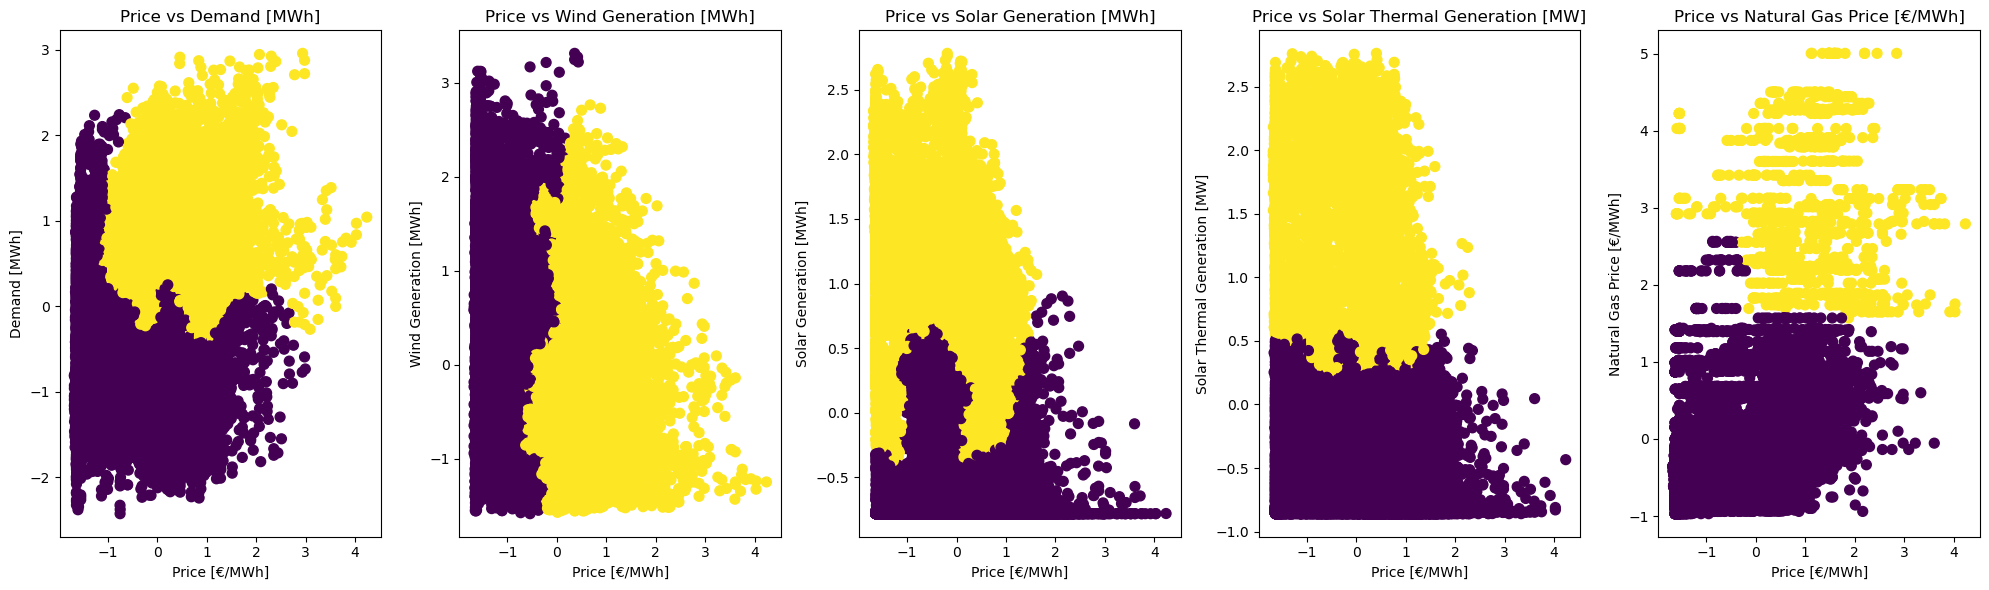

In [24]:
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

# Lista de variables para comparar con Price
variables_to_compare = ['Demand [MWh]', 'Wind Generation [MWh]', 
                        'Solar Generation [MWh]', 'Solar Thermal Generation [MW]', 
                        'Natural Gas Price [€/MWh]']

# Crear una figura con múltiples subgráficos
fig, axes = plt.subplots(nrows=1, ncols=len(variables_to_compare), figsize=(20, 6))

# Iterar sobre las variables y realizar el clustering
for i, variable in enumerate(variables_to_compare):
    # Crear el subset con Price y la variable actual
    df_subset = dataset[['Price [€/MWh]', variable]]
    
    # Escalar los datos
    scaler = StandardScaler()
    df_scaled = scaler.fit_transform(df_subset)
    
    # Aplicar Agglomerative Clustering
    agg_clustering = AgglomerativeClustering(n_clusters=2)  # Cambia n_clusters si es necesario
    y_hierarchical = agg_clustering.fit_predict(df_scaled)
    
    # Graficar los resultados
    ax = axes[i]
    ax.scatter(df_scaled[:, 0], df_scaled[:, 1], c=y_hierarchical, cmap='viridis', s=50)
    ax.set_title(f'Price vs {variable}')
    ax.set_xlabel('Price [€/MWh]')
    ax.set_ylabel(variable)

# Ajustar la disposición de los gráficos
plt.tight_layout()
plt.show()

### Agglomerative analysis results for electricity price and influencing variables for 3 clusters.

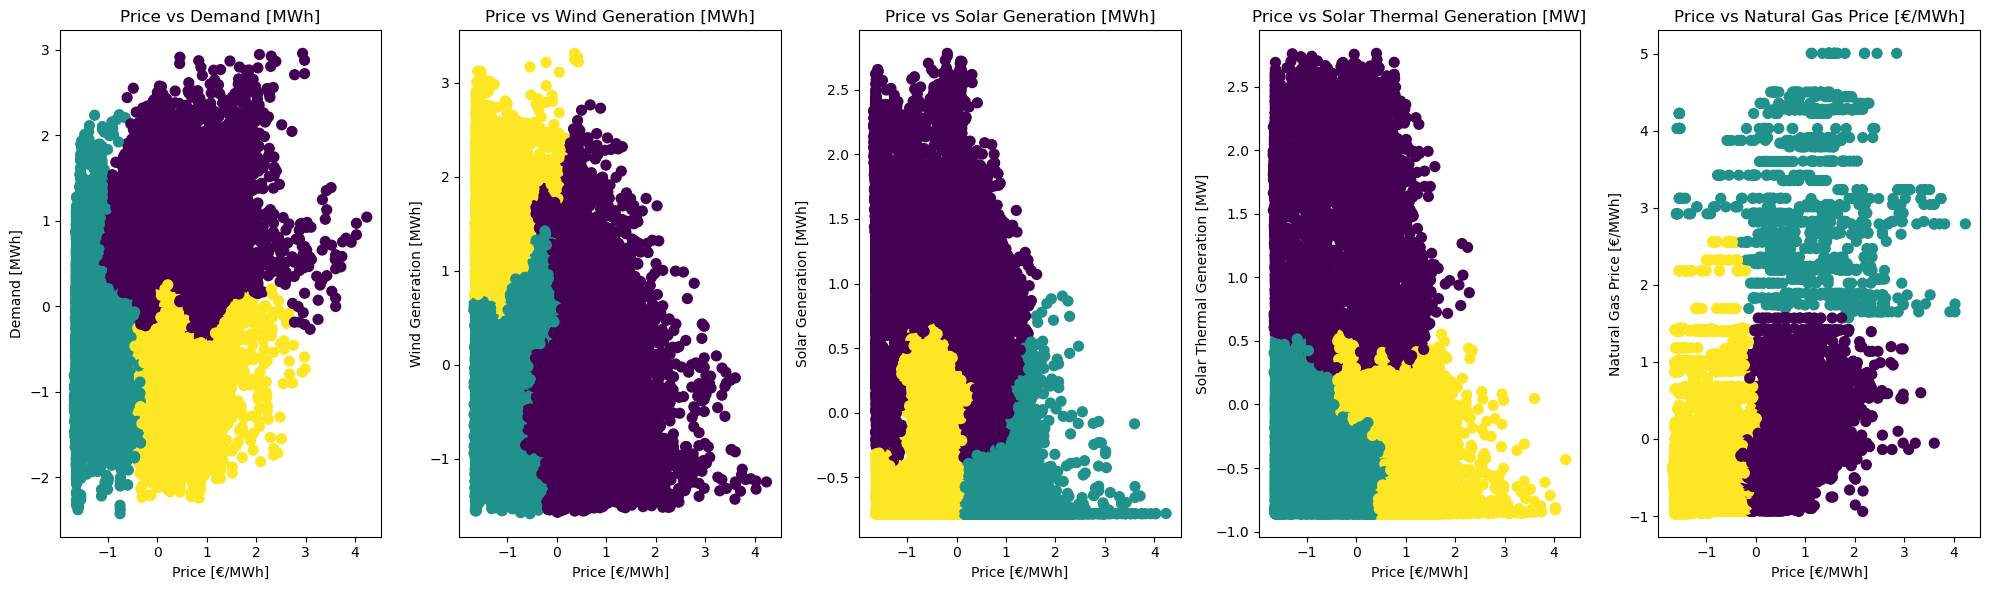

In [26]:
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

# Lista de variables para comparar con Price
variables_to_compare = ['Demand [MWh]', 'Wind Generation [MWh]', 
                        'Solar Generation [MWh]', 'Solar Thermal Generation [MW]', 
                        'Natural Gas Price [€/MWh]']

# Crear una figura con múltiples subgráficos
fig, axes = plt.subplots(nrows=1, ncols=len(variables_to_compare), figsize=(20, 6))

# Iterar sobre las variables y realizar el clustering
for i, variable in enumerate(variables_to_compare):
    # Crear el subset con Price y la variable actual
    df_subset = dataset[['Price [€/MWh]', variable]]
    
    # Escalar los datos
    scaler = StandardScaler()
    df_scaled = scaler.fit_transform(df_subset)
    
    # Aplicar Agglomerative Clustering
    agg_clustering = AgglomerativeClustering(n_clusters=3)  # Cambia n_clusters si es necesario
    y_hierarchical = agg_clustering.fit_predict(df_scaled)
    
    # Graficar los resultados
    ax = axes[i]
    ax.scatter(df_scaled[:, 0], df_scaled[:, 1], c=y_hierarchical, cmap='viridis', s=50)
    ax.set_title(f'Price vs {variable}')
    ax.set_xlabel('Price [€/MWh]')
    ax.set_ylabel(variable)

# Ajustar la disposición de los gráficos
plt.tight_layout()
plt.show()

### Agglomerative analysis results for electricity price and influencing variables for 4 clusters.

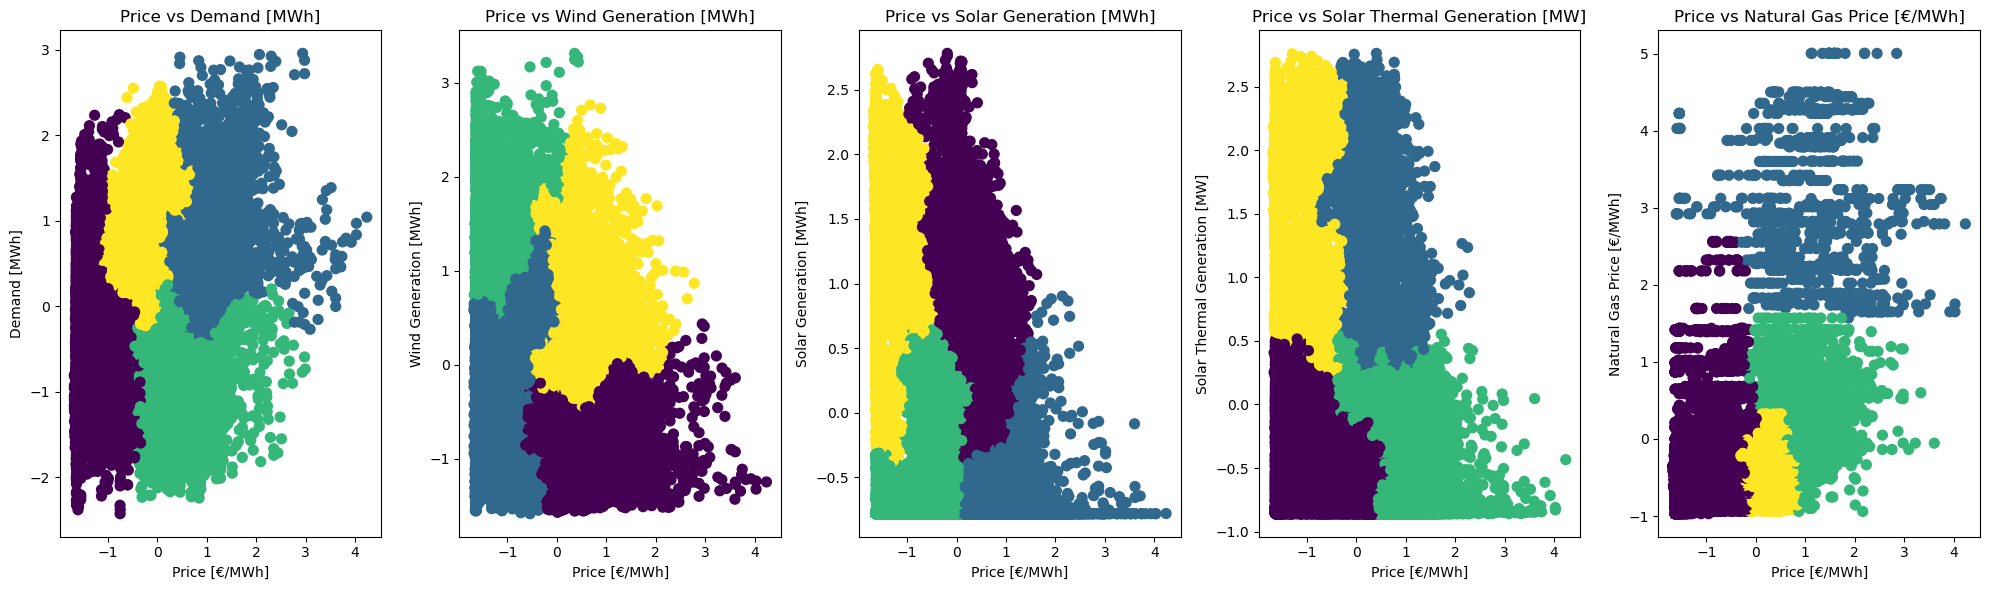

In [28]:
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

# Lista de variables para comparar con Price
variables_to_compare = ['Demand [MWh]', 'Wind Generation [MWh]', 
                        'Solar Generation [MWh]', 'Solar Thermal Generation [MW]', 
                        'Natural Gas Price [€/MWh]']

# Crear una figura con múltiples subgráficos
fig, axes = plt.subplots(nrows=1, ncols=len(variables_to_compare), figsize=(20, 6))

# Iterar sobre las variables y realizar el clustering
for i, variable in enumerate(variables_to_compare):
    # Crear el subset con Price y la variable actual
    df_subset = dataset[['Price [€/MWh]', variable]]
    
    # Escalar los datos
    scaler = StandardScaler()
    df_scaled = scaler.fit_transform(df_subset)
    
    # Aplicar Agglomerative Clustering
    agg_clustering = AgglomerativeClustering(n_clusters=4)  # Cambia n_clusters si es necesario
    y_hierarchical = agg_clustering.fit_predict(df_scaled)
    
    # Graficar los resultados
    ax = axes[i]
    ax.scatter(df_scaled[:, 0], df_scaled[:, 1], c=y_hierarchical, cmap='viridis', s=50)
    ax.set_title(f'Price vs {variable}')
    ax.set_xlabel('Price [€/MWh]')
    ax.set_ylabel(variable)

# Ajustar la disposición de los gráficos
plt.tight_layout()
plt.show()

### Agglomerative analysis results for electricity price and time-related variables (month and weekend) for 2 clusters.

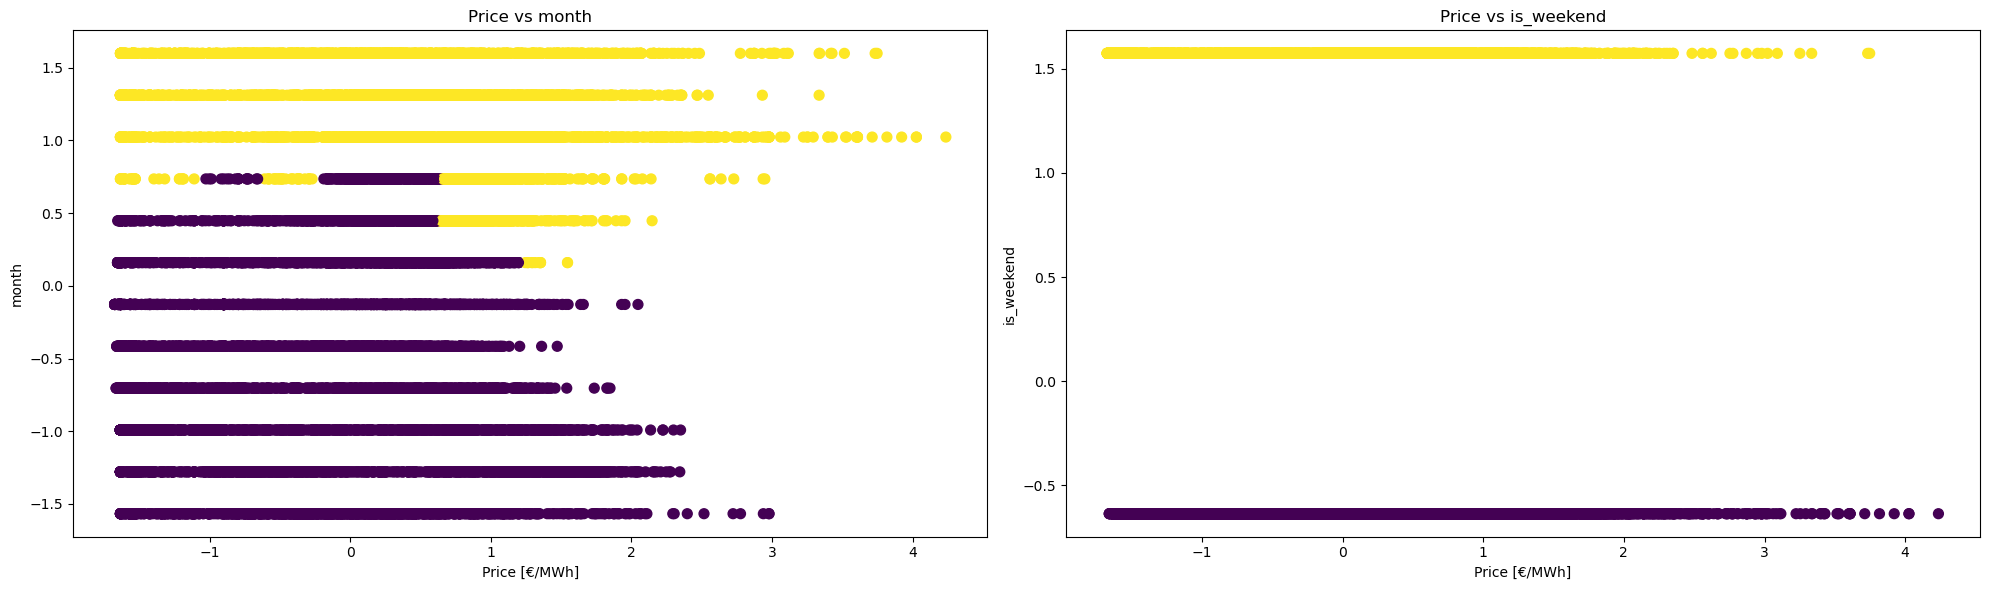

In [30]:
# Lista de variables para comparar con Price
variables_to_compare = ['month','is_weekend']

# Crear una figura con múltiples subgráficos
fig, axes = plt.subplots(nrows=1, ncols=len(variables_to_compare), figsize=(20, 6))

# Iterar sobre las variables y realizar el clustering
for i, variable in enumerate(variables_to_compare):
    # Crear el subset con Price y la variable actual
    df_subset = dataset[['Price [€/MWh]', variable]]
    
    # Escalar los datos
    scaler = StandardScaler()
    df_scaled = scaler.fit_transform(df_subset)
    
    # Aplicar Agglomerative Clustering
    agg_clustering = AgglomerativeClustering(n_clusters=2)  # Cambia n_clusters si es necesario
    y_hierarchical = agg_clustering.fit_predict(df_scaled)
    
    # Graficar los resultados
    ax = axes[i]
    ax.scatter(df_scaled[:, 0], df_scaled[:, 1], c=y_hierarchical, cmap='viridis', s=50)
    ax.set_title(f'Price vs {variable}')
    ax.set_xlabel('Price [€/MWh]')
    ax.set_ylabel(variable)

# Ajustar la disposición de los gráficos
plt.tight_layout()
plt.show()

### Agglomerative analysis results for electricity price and time-related variables (month and weekend) for 3 clusters.

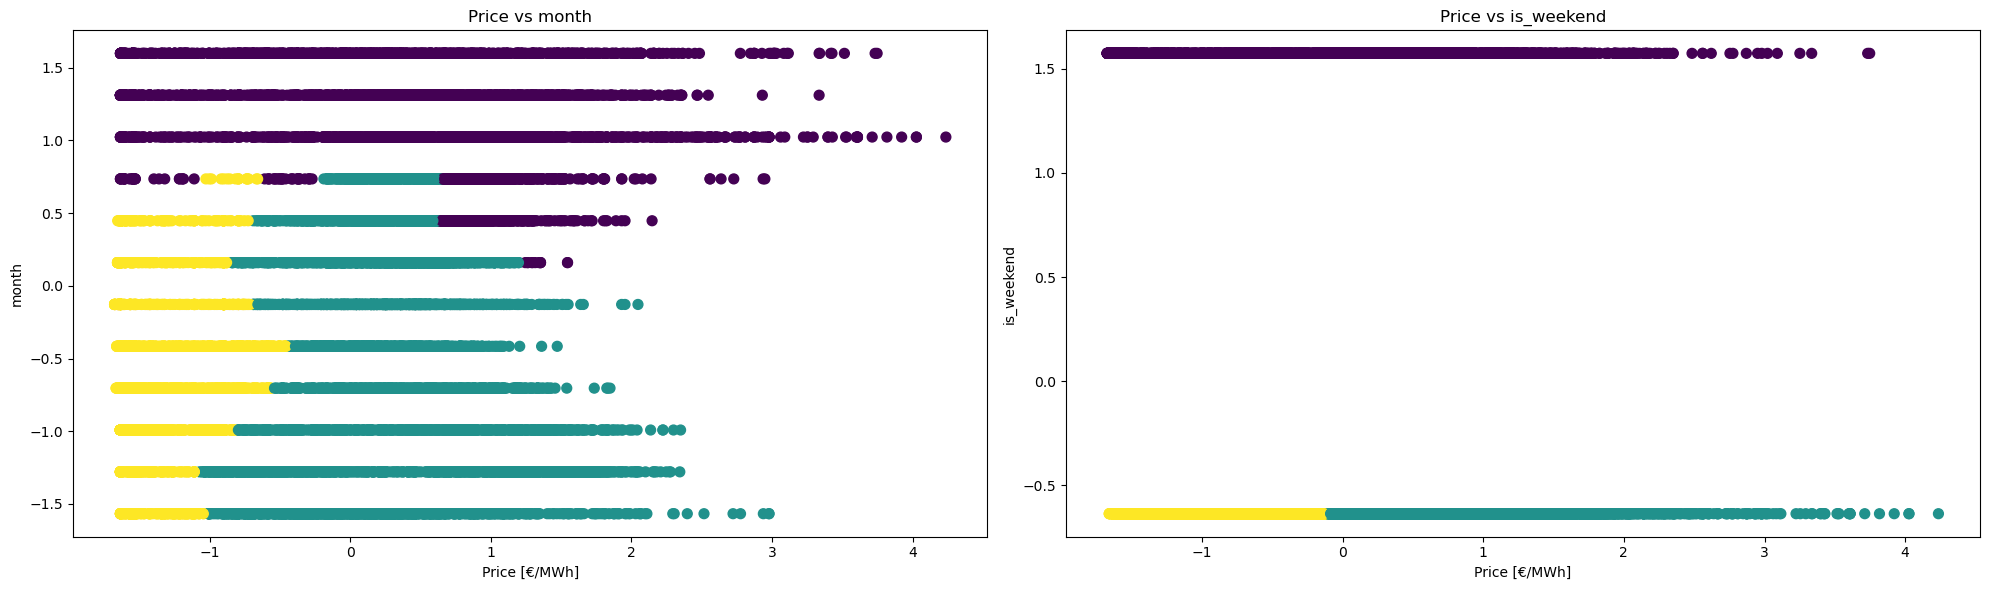

In [32]:
# Lista de variables para comparar con Price
variables_to_compare = ['month','is_weekend']

# Crear una figura con múltiples subgráficos
fig, axes = plt.subplots(nrows=1, ncols=len(variables_to_compare), figsize=(20, 6))

# Iterar sobre las variables y realizar el clustering
for i, variable in enumerate(variables_to_compare):
    # Crear el subset con Price y la variable actual
    df_subset = dataset[['Price [€/MWh]', variable]]
    
    # Escalar los datos
    scaler = StandardScaler()
    df_scaled = scaler.fit_transform(df_subset)
    
    # Aplicar Agglomerative Clustering
    agg_clustering = AgglomerativeClustering(n_clusters=3)  # Cambia n_clusters si es necesario
    y_hierarchical = agg_clustering.fit_predict(df_scaled)
    
    # Graficar los resultados
    ax = axes[i]
    ax.scatter(df_scaled[:, 0], df_scaled[:, 1], c=y_hierarchical, cmap='viridis', s=50)
    ax.set_title(f'Price vs {variable}')
    ax.set_xlabel('Price [€/MWh]')
    ax.set_ylabel(variable)

# Ajustar la disposición de los gráficos
plt.tight_layout()
plt.show()

### Agglomerative analysis results for electricity price and time-related variables (month and weekend) for 4 clusters.

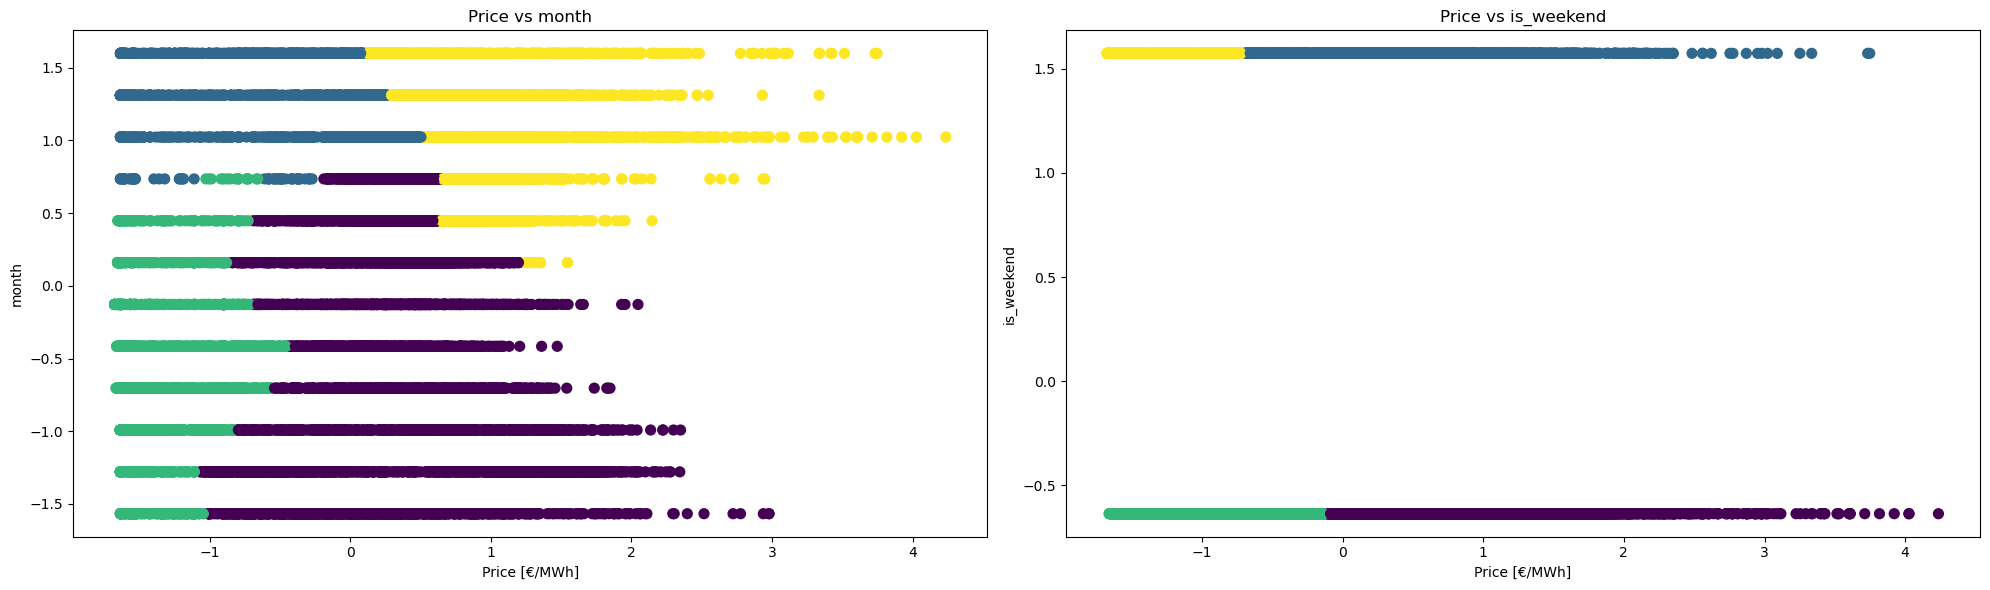

In [34]:
# Lista de variables para comparar con Price
variables_to_compare = ['month','is_weekend']

# Crear una figura con múltiples subgráficos
fig, axes = plt.subplots(nrows=1, ncols=len(variables_to_compare), figsize=(20, 6))

# Iterar sobre las variables y realizar el clustering
for i, variable in enumerate(variables_to_compare):
    # Crear el subset con Price y la variable actual
    df_subset = dataset[['Price [€/MWh]', variable]]
    
    # Escalar los datos
    scaler = StandardScaler()
    df_scaled = scaler.fit_transform(df_subset)
    
    # Aplicar Agglomerative Clustering
    agg_clustering = AgglomerativeClustering(n_clusters=4)  # Cambia n_clusters si es necesario
    y_hierarchical = agg_clustering.fit_predict(df_scaled)
    
    # Graficar los resultados
    ax = axes[i]
    ax.scatter(df_scaled[:, 0], df_scaled[:, 1], c=y_hierarchical, cmap='viridis', s=50)
    ax.set_title(f'Price vs {variable}')
    ax.set_xlabel('Price [€/MWh]')
    ax.set_ylabel(variable)

# Ajustar la disposición de los gráficos
plt.tight_layout()
plt.show()

## 2. K-means

#### Price vs. Demand

Text(0.5, 1.0, 'Prive vs. Demand')

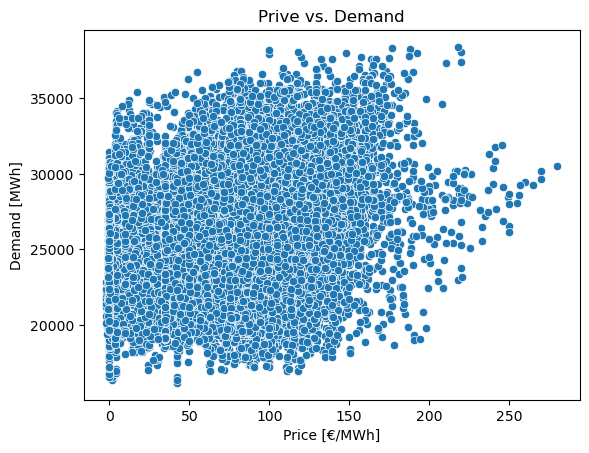

In [37]:
sns.scatterplot(x='Price [€/MWh]', y='Demand [MWh]', data=dataset)
plt.title('Prive vs. Demand')

##### Elbow method

In [39]:
from sklearn.preprocessing import StandardScaler

# create a subset/specific dataframe for this exercise
df_price_demand= dataset[['Price [€/MWh]', 'Demand [MWh]']]

# Scale the data
scaler = StandardScaler()
df_price_demand_scaled = scaler.fit_transform(df_price_demand)

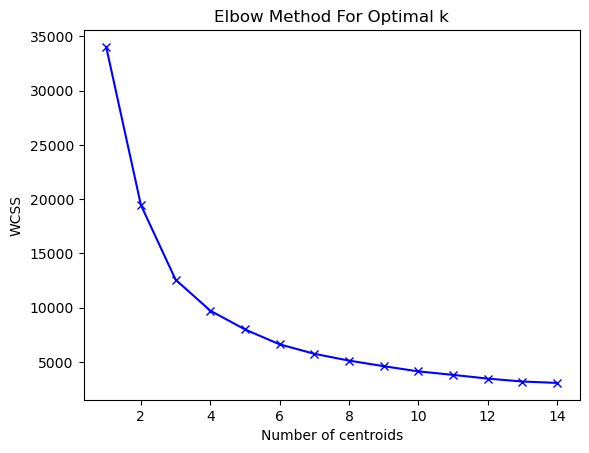

In [40]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

wcss = []
K = range(1,15)

for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df_price_demand_scaled)
    wcss.append(km.inertia_)
plt.plot(K, wcss, 'bx-')
plt.xlabel('Number of centroids')
plt.ylabel('WCSS')
plt.title('Elbow Method For Optimal k')
plt.show()

- K (optimal) = 3

In [42]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(df_price_demand_scaled)
y_kmeans = kmeans.predict(df_price_demand_scaled)

Text(0, 0.5, 'Demand [MWh]')

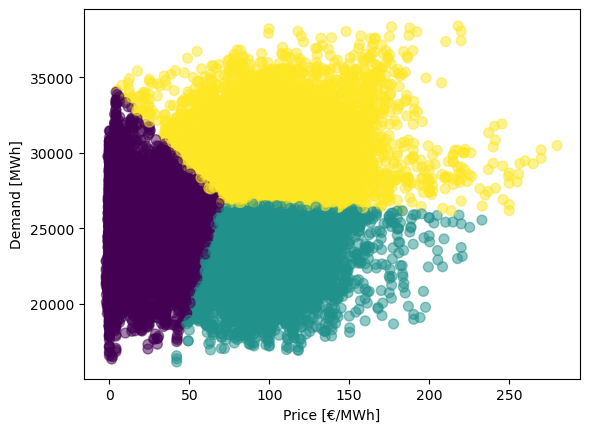

In [43]:
plt.scatter(dataset['Price [€/MWh]'], dataset['Demand [MWh]'], c=y_kmeans, s=50, alpha=0.5,cmap='viridis')
centers = kmeans.cluster_centers_
plt.xlabel('Price [€/MWh]')
plt.ylabel('Demand [MWh]')

#### Price vs. Wind Generation

Text(0.5, 1.0, 'Prive vs. Wind Generation')

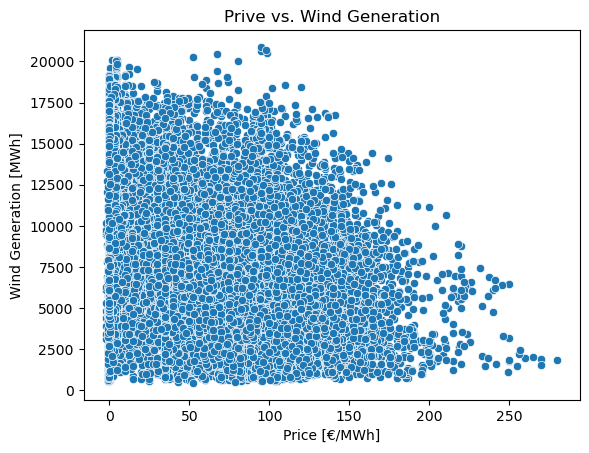

In [45]:
sns.scatterplot(x='Price [€/MWh]', y='Wind Generation [MWh]', data=dataset)
plt.title('Prive vs. Wind Generation')

##### Elbow method

In [47]:
from sklearn.preprocessing import StandardScaler

# create a subset/specific dataframe for this exercise
df_price_wind= dataset[['Price [€/MWh]', 'Wind Generation [MWh]']]

# Scale the data
scaler = StandardScaler()
df_price_wind_scaled = scaler.fit_transform(df_price_wind)

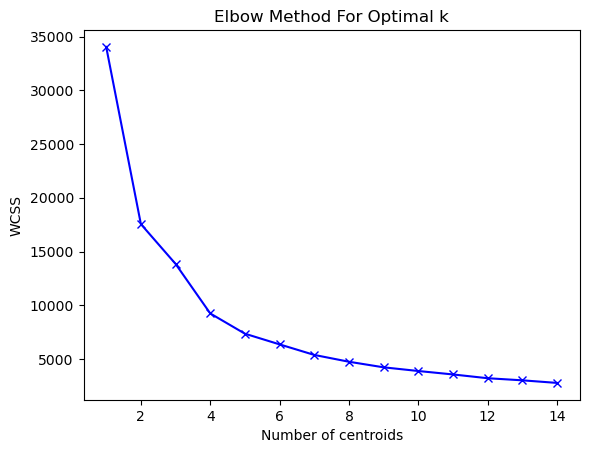

In [48]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

wcss = []
K = range(1,15)

for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df_price_wind_scaled)
    wcss.append(km.inertia_)
plt.plot(K, wcss, 'bx-')
plt.xlabel('Number of centroids')
plt.ylabel('WCSS')
plt.title('Elbow Method For Optimal k')
plt.show()

- K (optimal) = 4

Text(0, 0.5, 'Wind Generation [MWh]')

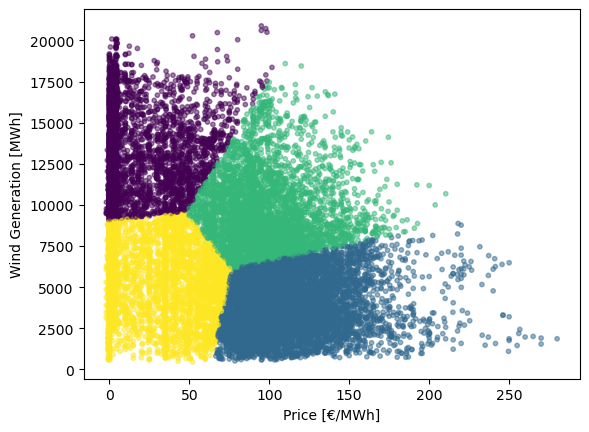

In [50]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(df_price_wind_scaled)
y_kmeans = kmeans.predict(df_price_wind_scaled)

plt.scatter(dataset['Price [€/MWh]'], dataset['Wind Generation [MWh]'], c=y_kmeans, s=10, alpha=0.5,cmap='viridis')
centers = kmeans.cluster_centers_
plt.xlabel('Price [€/MWh]')
plt.ylabel('Wind Generation [MWh]')

#### Price vs. Solar Generation

Text(0.5, 1.0, 'Prive vs. Solar Generation')

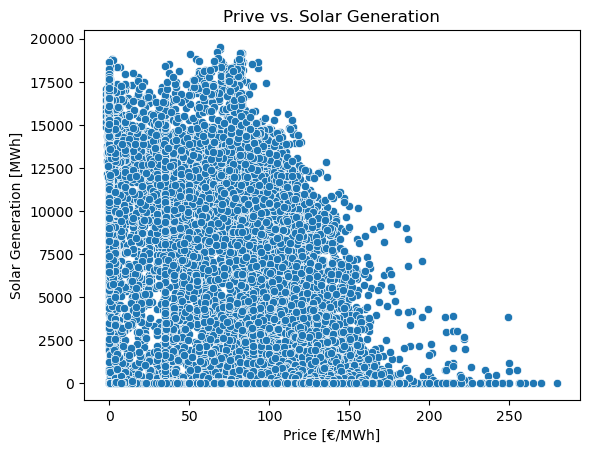

In [52]:
sns.scatterplot(x='Price [€/MWh]', y='Solar Generation [MWh]', data=dataset)
plt.title('Prive vs. Solar Generation')

##### Elbow method

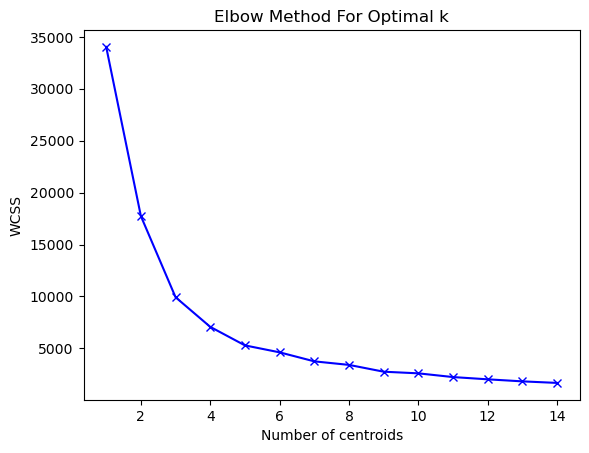

In [54]:
from sklearn.preprocessing import StandardScaler

# create a subset/specific dataframe for this exercise
df_price_solar= dataset[['Price [€/MWh]', 'Solar Generation [MWh]']]

# Scale the data
scaler = StandardScaler()
df_price_solar_scaled = scaler.fit_transform(df_price_solar)

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

wcss = []
K = range(1,15)

for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df_price_solar_scaled)
    wcss.append(km.inertia_)
plt.plot(K, wcss, 'bx-')
plt.xlabel('Number of centroids')
plt.ylabel('WCSS')
plt.title('Elbow Method For Optimal k')
plt.show()

- k (optimal) = 4

Text(0, 0.5, 'Solar Generation [MWh]')

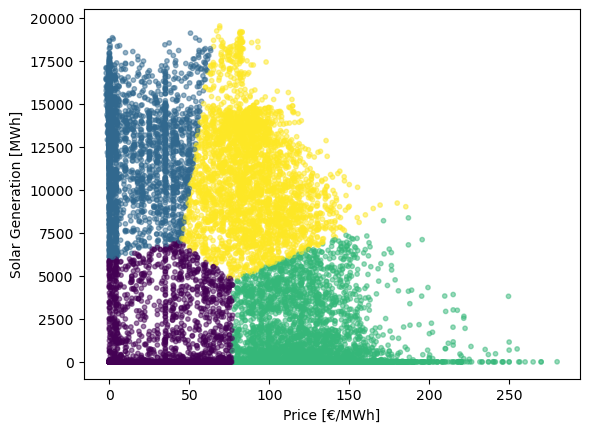

In [56]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(df_price_solar_scaled)
y_kmeans = kmeans.predict(df_price_solar_scaled)

plt.scatter(dataset['Price [€/MWh]'], dataset['Solar Generation [MWh]'], c=y_kmeans, s=10, alpha=0.5,cmap='viridis')
centers = kmeans.cluster_centers_
plt.xlabel('Price [€/MWh]')
plt.ylabel('Solar Generation [MWh]')

#### Price vs. Solar Thermal Generation

Text(0.5, 1.0, 'Prive vs. Solar Thermal Generation')

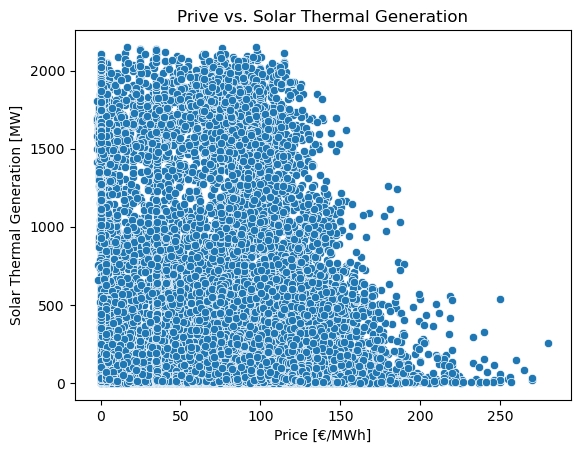

In [58]:
sns.scatterplot(x='Price [€/MWh]', y='Solar Thermal Generation [MW]', data=dataset)
plt.title('Prive vs. Solar Thermal Generation')

##### Elbow method

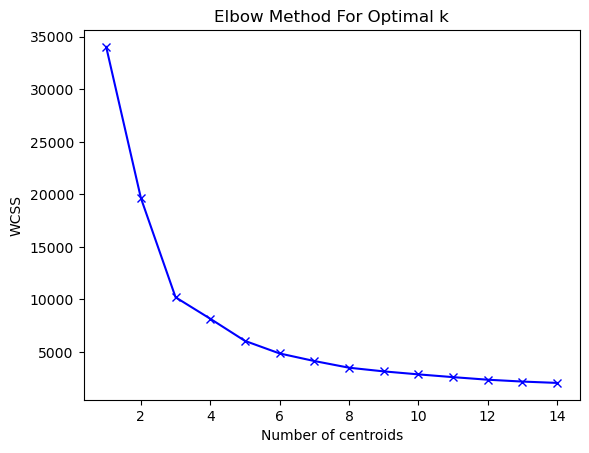

In [60]:
from sklearn.preprocessing import StandardScaler

# create a subset/specific dataframe for this exercise
df_price_solar_thermal= dataset[['Price [€/MWh]', 'Solar Thermal Generation [MW]']]

# Scale the data
scaler = StandardScaler()
df_price_solar_thermal_scaled = scaler.fit_transform(df_price_solar_thermal)

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

wcss = []
K = range(1,15)

for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df_price_solar_thermal_scaled)
    wcss.append(km.inertia_)
plt.plot(K, wcss, 'bx-')
plt.xlabel('Number of centroids')
plt.ylabel('WCSS')
plt.title('Elbow Method For Optimal k')
plt.show()

- k (optimal) = 3

Text(0, 0.5, 'Solar Thermal Generation [MW]')

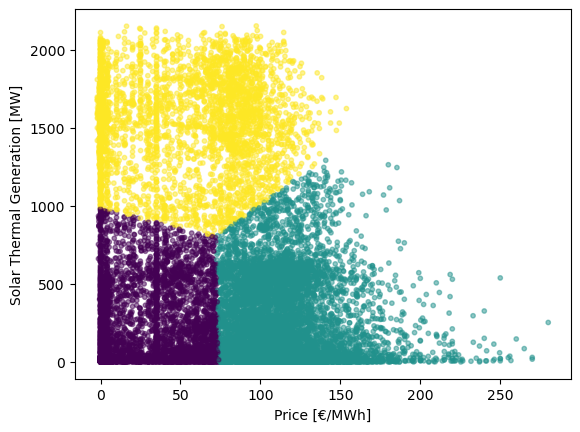

In [62]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(df_price_solar_thermal_scaled)
y_kmeans = kmeans.predict(df_price_solar_thermal_scaled)

plt.scatter(dataset['Price [€/MWh]'], dataset['Solar Thermal Generation [MW]'], c=y_kmeans, s=10, alpha=0.5,cmap='viridis')
centers = kmeans.cluster_centers_
plt.xlabel('Price [€/MWh]')
plt.ylabel('Solar Thermal Generation [MW]')

#### Electricity Price vs. Natural Gas Price

Text(0.5, 1.0, 'Electricity Price vs. Natural Gas Price')

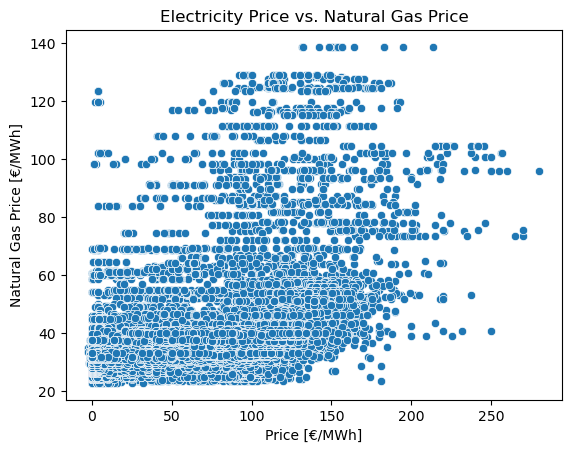

In [64]:
sns.scatterplot(x='Price [€/MWh]', y='Natural Gas Price [€/MWh]', data=dataset)
plt.title('Electricity Price vs. Natural Gas Price')

##### Elbow method

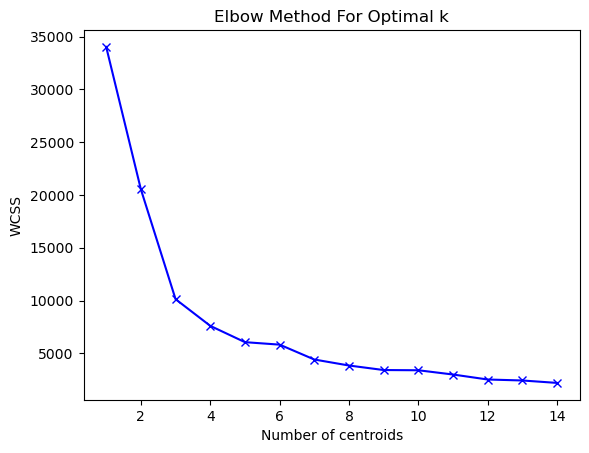

In [66]:
from sklearn.preprocessing import StandardScaler

# create a subset/specific dataframe for this exercise
df_price_natural_gas = dataset[['Price [€/MWh]', 'Natural Gas Price [€/MWh]']]

# Scale the data
scaler = StandardScaler()
df_price_natural_gas_scaled = scaler.fit_transform(df_price_natural_gas)

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

wcss = []
K = range(1,15)

for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df_price_natural_gas_scaled)
    wcss.append(km.inertia_)
plt.plot(K, wcss, 'bx-')
plt.xlabel('Number of centroids')
plt.ylabel('WCSS')
plt.title('Elbow Method For Optimal k')
plt.show()

- K (optimal) = 3

Text(0, 0.5, 'Natural Gas Price [€/MWh]')

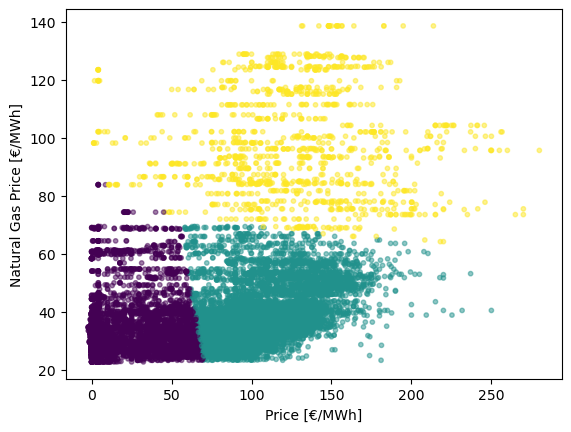

In [68]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(df_price_natural_gas_scaled )
y_kmeans = kmeans.predict(df_price_natural_gas_scaled )

plt.scatter(dataset['Price [€/MWh]'], dataset['Natural Gas Price [€/MWh]'], c=y_kmeans, s=10, alpha=0.5,cmap='viridis')
centers = kmeans.cluster_centers_
plt.xlabel('Price [€/MWh]')
plt.ylabel('Natural Gas Price [€/MWh]')

#### Price vs. is_weekend

Text(0.5, 1.0, 'Electricity Price vs. is_weekend')

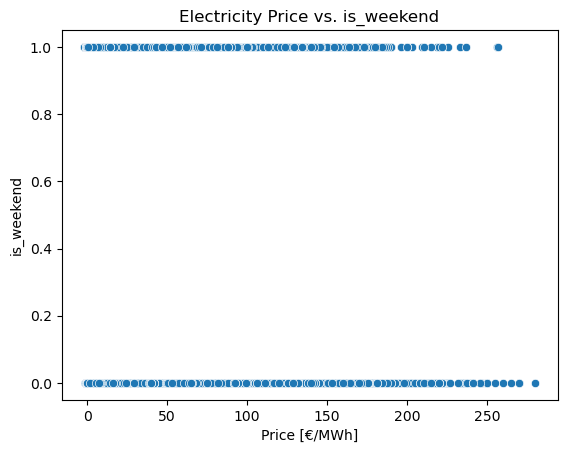

In [70]:
sns.scatterplot(x='Price [€/MWh]', y='is_weekend', data=dataset)
plt.title('Electricity Price vs. is_weekend')

##### Elbow method

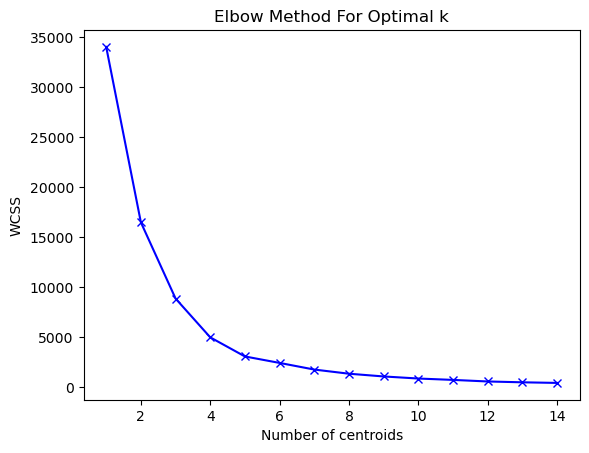

In [72]:
from sklearn.preprocessing import StandardScaler

# create a subset/specific dataframe for this exercise
df_price_weekend= dataset[['Price [€/MWh]', 'is_weekend']]

# Scale the data
scaler = StandardScaler()
df_price_weekend_scaled = scaler.fit_transform(df_price_weekend)

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

wcss = []
K = range(1,15)

for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df_price_weekend_scaled)
    wcss.append(km.inertia_)
plt.plot(K, wcss, 'bx-')
plt.xlabel('Number of centroids')
plt.ylabel('WCSS')
plt.title('Elbow Method For Optimal k')
plt.show()

Text(0, 0.5, 'Natural Gas Price [€/MWh]')

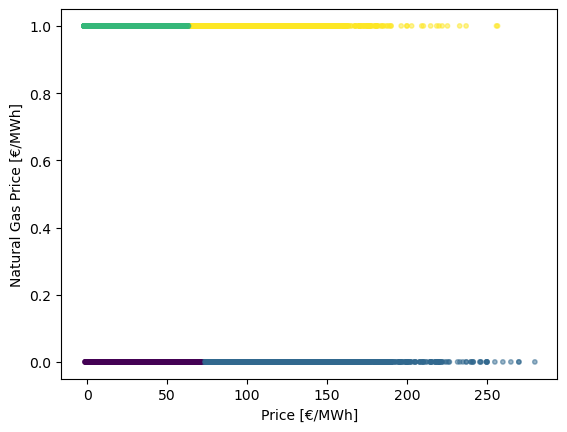

In [73]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(df_price_weekend_scaled)
y_kmeans = kmeans.predict(df_price_weekend_scaled)

plt.scatter(dataset['Price [€/MWh]'], dataset['is_weekend'], c=y_kmeans, s=10, alpha=0.5,cmap='viridis')
centers = kmeans.cluster_centers_
plt.xlabel('Price [€/MWh]')
plt.ylabel('Natural Gas Price [€/MWh]')

#### Price vs. month

Text(0.5, 1.0, 'Electricity Price vs. month')

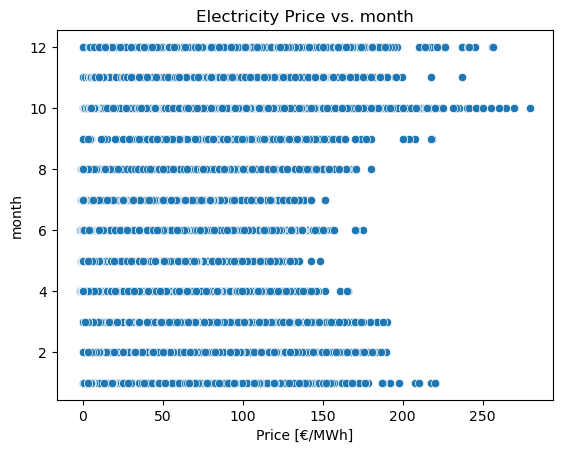

In [75]:
sns.scatterplot(x='Price [€/MWh]', y='month', data=dataset)
plt.title('Electricity Price vs. month')

##### Elbow method

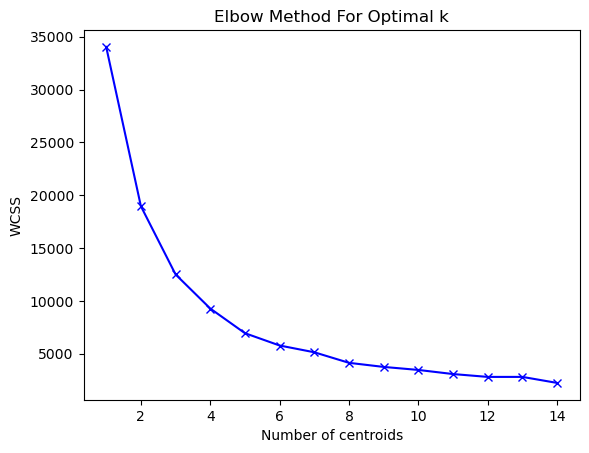

In [77]:
from sklearn.preprocessing import StandardScaler

# create a subset/specific dataframe for this exercise
df_price_month= dataset[['Price [€/MWh]', 'month']]

# Scale the data
scaler = StandardScaler()
df_price_month_scaled = scaler.fit_transform(df_price_month)

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

wcss = []
K = range(1,15)

for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df_price_month_scaled)
    wcss.append(km.inertia_)
plt.plot(K, wcss, 'bx-')
plt.xlabel('Number of centroids')
plt.ylabel('WCSS')
plt.title('Elbow Method For Optimal k')
plt.show()

Text(0, 0.5, 'month')

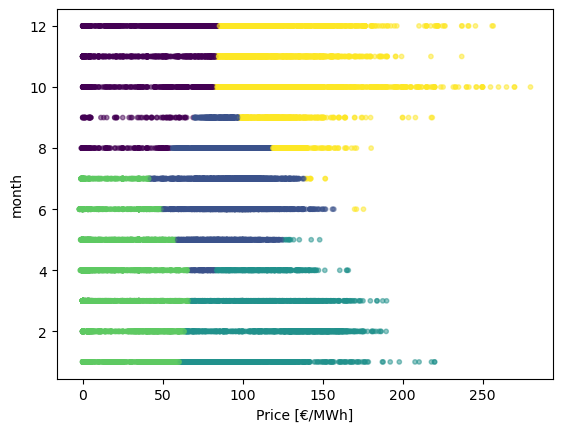

In [78]:
kmeans = KMeans(n_clusters=5, random_state=0).fit(df_price_month_scaled)
y_kmeans = kmeans.predict(df_price_month_scaled)

plt.scatter(dataset['Price [€/MWh]'], dataset['month'], c=y_kmeans, s=10, alpha=0.5,cmap='viridis')
centers = kmeans.cluster_centers_
plt.xlabel('Price [€/MWh]')
plt.ylabel('month')

## 3. Principal Component Analysis (PCA)

In [80]:
#dataset without lag variables
df= dataset[['Price [€/MWh]', 'month','is_weekend','Wind Generation [MWh]','Solar Generation [MWh]','Solar Thermal Generation [MW]', 'Natural Gas Price [€/MWh]']]
df

Price [€/MWh]  month  is_weekend  Wind Generation [MWh]  \
datetime                                                                       
2022-09-24 00:00:00         160.08      9           1                 4917.8   
2022-09-24 01:00:00         147.00      9           1                 4718.5   
2022-09-24 02:00:00         127.93      9           1                 4614.0   
2022-09-24 03:00:00         117.46      9           1                 4510.5   
2022-09-24 04:00:00         117.16      9           1                 4513.3   
...                            ...    ...         ...                    ...   
2024-09-01 19:00:00         123.60      9           1                 2544.8   
2024-09-01 20:00:00         134.02      9           1                 2766.8   
2024-09-01 21:00:00         141.74      9           1                 3083.8   
2024-09-01 22:00:00         139.70      9           1                 3484.3   
2024-09-01 23:00:00         129.10      9           1                 3724.8   

                     Solar Generation [MWh]  Solar Thermal Generation [MW]  \
datetime                                                                     
2022-09-24 00:00:00                     0.0                        211.575   
2022-09-24 01:00:00                     0.0                        199.700   
2022-09-24 02:00:00                     0.0                         53.825   
2022-09-24 03:00:00                     0.0                         41.150   
2022-09-24 04:00:00                     0.0                         11.000   
...                                     ...                            ...   
2024-09-01 19:00:00                  5214.1                        861.375   
2024-09-01 20:00:00                   845.1                        547.300   
2024-09-01 21:00:00                     0.2                        476.650   
2024-09-01 22:00:00                     0.0                        431.975   
2024-09-01 23:00:00                     0.0                        431.975   

                     Natural Gas Price [€/MWh]  
datetime                                        
2022-09-24 00:00:00                     116.70  
2022-09-24 01:00:00                     116.70  
2022-09-24 02:00:00                     116.70  
2022-09-24 03:00:00                     116.70  
2022-09-24 04:00:00                     116.70  
...                                        ...  
2024-09-01 19:00:00                      39.88  
2024-09-01 20:00:00                      39.88  
2024-09-01 21:00:00                      39.88  
2024-09-01 22:00:00                      39.88  
2024-09-01 23:00:00                      39.88  

[17016 rows x 7 columns]

### Dimension reduction: PCA

In [82]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)  # Scaling the data

pca = PCA(n_components=2)
results_pca = pca.fit_transform(df)
print(results_pca)

[[-3372.40861989 -3408.8481905 ]
 [-3309.43155024 -3597.6553952 ]
 [-3288.46775191 -3698.53249956]
 ...
 [-2760.45999334 -5141.62891267]
 [-2893.07813909 -4763.05520145]
 [-2970.26334383 -4535.24598031]]


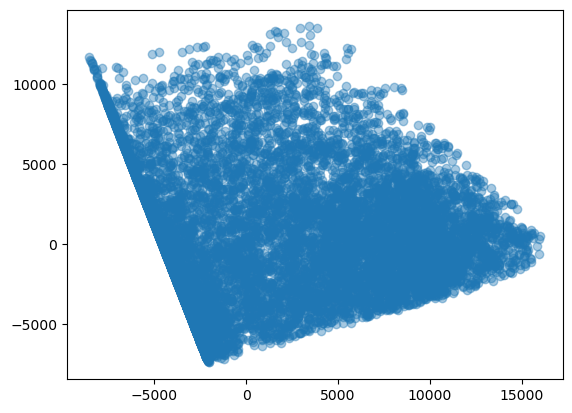

In [83]:
plt.scatter(results_pca[:, 0], results_pca[:, 1],alpha=0.4)
plt.show()

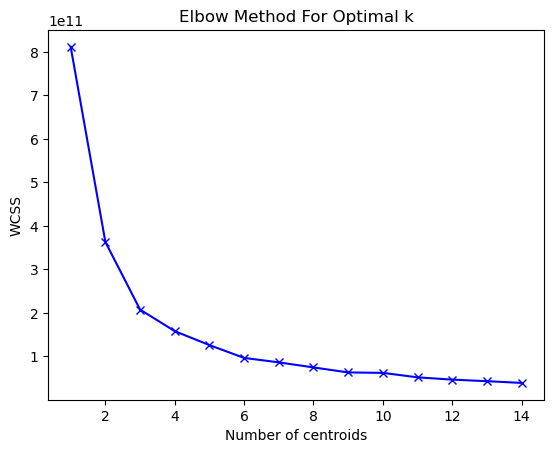

In [84]:
wcss = []
K = range(1,15)

for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(results_pca)
    wcss.append(km.inertia_)
    
plt.plot(K, wcss, 'bx-')
plt.xlabel('Number of centroids')
plt.ylabel('WCSS')
plt.title('Elbow Method For Optimal k')
plt.show()

Text(0, 0.5, 'PC 2')

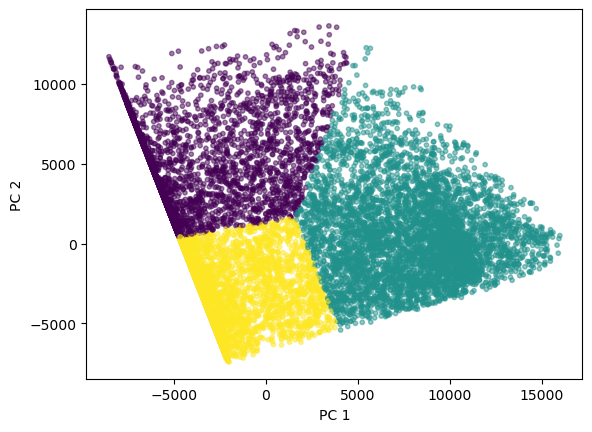

In [85]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(results_pca)
y_kmeans = kmeans.predict(results_pca)

plt.scatter(results_pca[:, 0], results_pca[:, 1], c=y_kmeans, s=10, alpha=0.5,cmap='viridis')
centers = kmeans.cluster_centers_
plt.xlabel('PC 1')
plt.ylabel('PC 2')

### Adding the resulting Clusters to the Original Data

In [87]:
df_labels = df.copy()
df_labels['cluster'] = y_kmeans
df_labels.head()

Price [€/MWh]  month  is_weekend  Wind Generation [MWh]  \
datetime                                                                       
2022-09-24 00:00:00         160.08      9           1                 4917.8   
2022-09-24 01:00:00         147.00      9           1                 4718.5   
2022-09-24 02:00:00         127.93      9           1                 4614.0   
2022-09-24 03:00:00         117.46      9           1                 4510.5   
2022-09-24 04:00:00         117.16      9           1                 4513.3   

                     Solar Generation [MWh]  Solar Thermal Generation [MW]  \
datetime                                                                     
2022-09-24 00:00:00                     0.0                        211.575   
2022-09-24 01:00:00                     0.0                        199.700   
2022-09-24 02:00:00                     0.0                         53.825   
2022-09-24 03:00:00                     0.0                         41.150   
2022-09-24 04:00:00                     0.0                         11.000   

                     Natural Gas Price [€/MWh]  cluster  
datetime                                                 
2022-09-24 00:00:00                      116.7        2  
2022-09-24 01:00:00                      116.7        2  
2022-09-24 02:00:00                      116.7        2  
2022-09-24 03:00:00                      116.7        2  
2022-09-24 04:00:00                      116.7        2

#### Price vs. Wind Generation

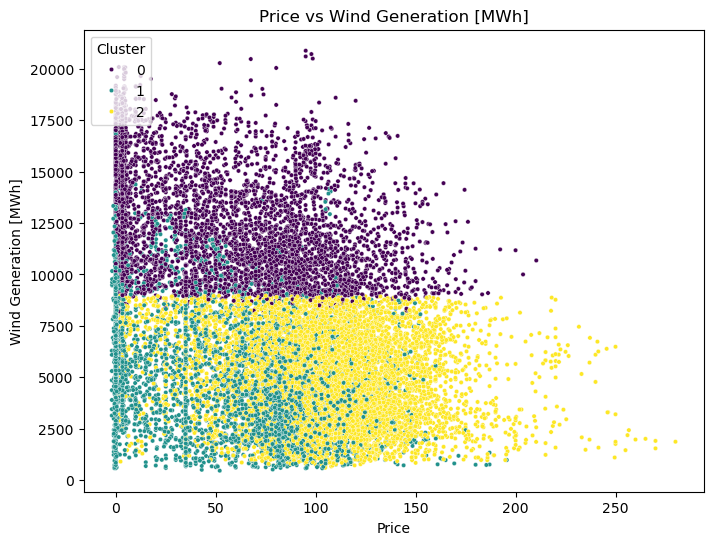

In [89]:
plt.figure(figsize=(8, 6))

# Scatter plot with color depending on the 'cluster' column
sns.scatterplot(data=df_labels, x='Price [€/MWh]', y='Wind Generation [MWh]', hue='cluster', palette='viridis', s=10)

# Customize the plot
plt.title('Price vs Wind Generation [MWh]')
plt.xlabel('Price')
plt.ylabel('Wind Generation [MWh]')
plt.legend(title='Cluster', loc='upper left')

# Show plot
plt.show()

#### Price vs. Solar Generation

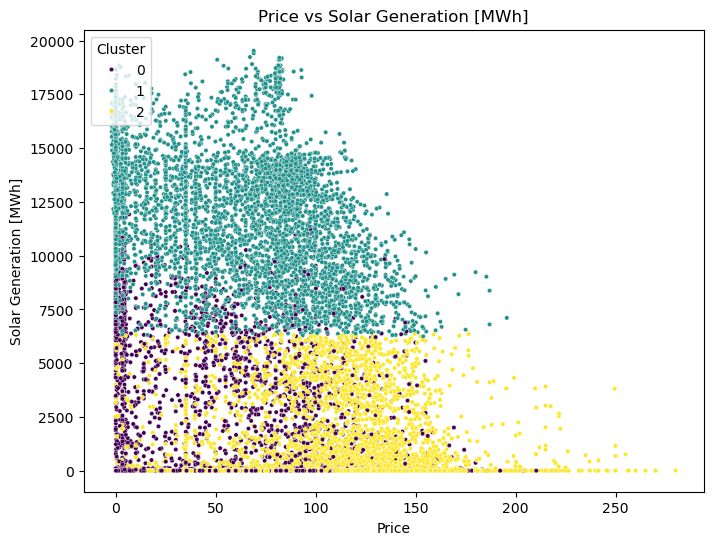

In [91]:
plt.figure(figsize=(8, 6))

# Scatter plot with color depending on the 'cluster' column
sns.scatterplot(data=df_labels, x='Price [€/MWh]', y='Solar Generation [MWh]', hue='cluster', palette='viridis', s=10)

# Customize the plot
plt.title('Price vs Solar Generation [MWh]')
plt.xlabel('Price')
plt.ylabel('Solar Generation [MWh]')
plt.legend(title='Cluster', loc='upper left')

# Show plot
plt.show()

#### Price vs. Solar Thermal Generation

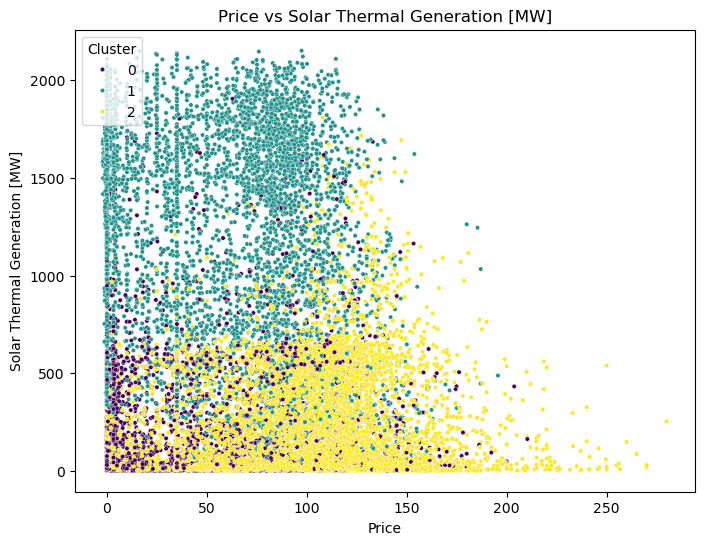

In [93]:
plt.figure(figsize=(8, 6))

# Scatter plot with color depending on the 'cluster' column
sns.scatterplot(data=df_labels, x='Price [€/MWh]', y='Solar Thermal Generation [MW]', hue='cluster', palette='viridis', s=10)

# Customize the plot
plt.title('Price vs Solar Thermal Generation [MW]')
plt.xlabel('Price')
plt.ylabel('Solar Thermal Generation [MW]')
plt.legend(title='Cluster', loc='upper left')

# Show plot
plt.show()

#### Price vs. Natural Gas Price

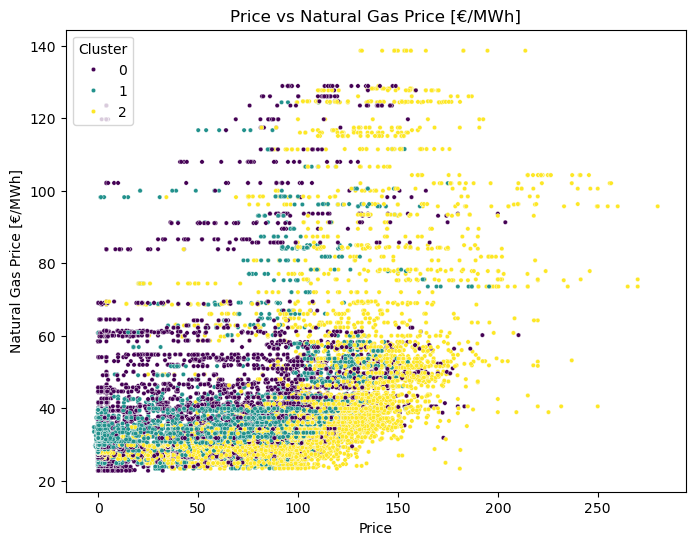

In [95]:
plt.figure(figsize=(8, 6))

# Scatter plot with color depending on the 'cluster' column
sns.scatterplot(data=df_labels, x='Price [€/MWh]', y='Natural Gas Price [€/MWh]', hue='cluster', palette='viridis', s=10)

# Customize the plot
plt.title('Price vs Natural Gas Price [€/MWh]')
plt.xlabel('Price')
plt.ylabel('Natural Gas Price [€/MWh]')
plt.legend(title='Cluster', loc='upper left')

# Show plot
plt.show()

#### Price vs. is_weekend

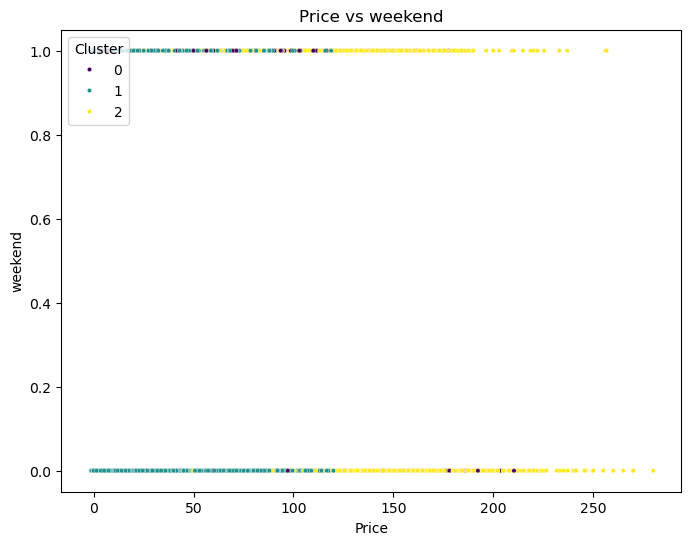

In [97]:
plt.figure(figsize=(8, 6))

# Scatter plot with color depending on the 'cluster' column
sns.scatterplot(data=df_labels, x='Price [€/MWh]', y='is_weekend', hue='cluster', palette='viridis', s=10)

# Customize the plot
plt.title('Price vs weekend')
plt.xlabel('Price')
plt.ylabel('weekend')
plt.legend(title='Cluster', loc='upper left')

# Show plot
plt.show()

#### Price vs. month

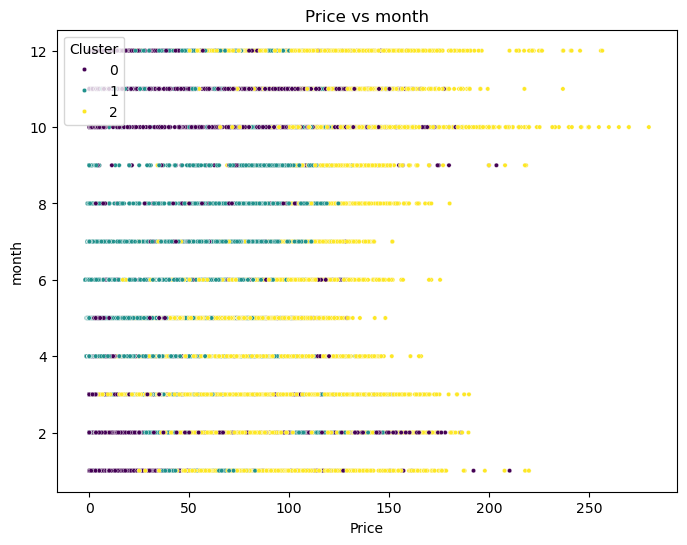

In [99]:
plt.figure(figsize=(8, 6))

# Scatter plot with color depending on the 'cluster' column
sns.scatterplot(data=df_labels, x='Price [€/MWh]', y='month', hue='cluster', palette='viridis', s=10)

# Customize the plot
plt.title('Price vs month')
plt.xlabel('Price')
plt.ylabel('month')
plt.legend(title='Cluster', loc='upper left')

# Show plot
plt.show()

## Second Analysis: Daily electricity price curves and temporal patterns using K-Means clustering

### Peparation of the dataset

In [103]:
df_price_hourly = pd.read_csv('data/export_MarginalPriceDayAheadMarket_2024-10-11_17_28.csv',delimiter=';')

In [105]:
df_price_hourly

id                                   name  geoid geoname   value  \
0      600  Marginal price Day Ahead market Spain      3   Spain  200.00   
1      600  Marginal price Day Ahead market Spain      3   Spain  181.99   
2      600  Marginal price Day Ahead market Spain      3   Spain  178.54   
3      600  Marginal price Day Ahead market Spain      3   Spain  178.54   
4      600  Marginal price Day Ahead market Spain      3   Spain  181.23   
...    ...                                    ...    ...     ...     ...   
17563  600  Marginal price Day Ahead market Spain      3   Spain  123.60   
17564  600  Marginal price Day Ahead market Spain      3   Spain  134.02   
17565  600  Marginal price Day Ahead market Spain      3   Spain  141.74   
17566  600  Marginal price Day Ahead market Spain      3   Spain  139.70   
17567  600  Marginal price Day Ahead market Spain      3   Spain  129.10   

                        datetime  
0      2022-09-01T00:00:00+02:00  
1      2022-09-01T01:00:00+02:00  
2      2022-09-01T02:00:00+02:00  
3      2022-09-01T03:00:00+02:00  
4      2022-09-01T04:00:00+02:00  
...                          ...  
17563  2024-09-01T19:00:00+02:00  
17564  2024-09-01T20:00:00+02:00  
17565  2024-09-01T21:00:00+02:00  
17566  2024-09-01T22:00:00+02:00  
17567  2024-09-01T23:00:00+02:00  

[17568 rows x 6 columns]

In [107]:
# Convertir la columna 'datetime' al formato de fecha y hora si no es ya datetime
if not pd.api.types.is_datetime64_any_dtype(df_price_hourly['datetime']):
    df_price_hourly['datetime'] = pd.to_datetime(
        df_price_hourly['datetime'].str.replace(r'\+.*', '', regex=True),
        errors='coerce')
df_price_hourly

id                                   name  geoid geoname   value  \
0      600  Marginal price Day Ahead market Spain      3   Spain  200.00   
1      600  Marginal price Day Ahead market Spain      3   Spain  181.99   
2      600  Marginal price Day Ahead market Spain      3   Spain  178.54   
3      600  Marginal price Day Ahead market Spain      3   Spain  178.54   
4      600  Marginal price Day Ahead market Spain      3   Spain  181.23   
...    ...                                    ...    ...     ...     ...   
17563  600  Marginal price Day Ahead market Spain      3   Spain  123.60   
17564  600  Marginal price Day Ahead market Spain      3   Spain  134.02   
17565  600  Marginal price Day Ahead market Spain      3   Spain  141.74   
17566  600  Marginal price Day Ahead market Spain      3   Spain  139.70   
17567  600  Marginal price Day Ahead market Spain      3   Spain  129.10   

                 datetime  
0     2022-09-01 00:00:00  
1     2022-09-01 01:00:00  
2     2022-09-01 02:00:00  
3     2022-09-01 03:00:00  
4     2022-09-01 04:00:00  
...                   ...  
17563 2024-09-01 19:00:00  
17564 2024-09-01 20:00:00  
17565 2024-09-01 21:00:00  
17566 2024-09-01 22:00:00  
17567 2024-09-01 23:00:00  

[17568 rows x 6 columns]

In [109]:
df_price_hourly.dtypes

id                   int64
name                object
geoid                int64
geoname             object
value              float64
datetime    datetime64[ns]
dtype: object

In [111]:
df_price_hourly = df_price_hourly.drop(columns=['id', 'name', 'geoid', 'geoname'])

In [113]:
df_price_hourly = df_price_hourly.rename(columns={'value':'Price [€/MWh]'})
df_price_hourly

Price [€/MWh]            datetime
0             200.00 2022-09-01 00:00:00
1             181.99 2022-09-01 01:00:00
2             178.54 2022-09-01 02:00:00
3             178.54 2022-09-01 03:00:00
4             181.23 2022-09-01 04:00:00
...              ...                 ...
17563         123.60 2024-09-01 19:00:00
17564         134.02 2024-09-01 20:00:00
17565         141.74 2024-09-01 21:00:00
17566         139.70 2024-09-01 22:00:00
17567         129.10 2024-09-01 23:00:00

[17568 rows x 2 columns]

In [115]:
df_price_hourly = df_price_hourly.set_index('datetime')
df_price_hourly

Price [€/MWh]
datetime                          
2022-09-01 00:00:00         200.00
2022-09-01 01:00:00         181.99
2022-09-01 02:00:00         178.54
2022-09-01 03:00:00         178.54
2022-09-01 04:00:00         181.23
...                            ...
2024-09-01 19:00:00         123.60
2024-09-01 20:00:00         134.02
2024-09-01 21:00:00         141.74
2024-09-01 22:00:00         139.70
2024-09-01 23:00:00         129.10

[17568 rows x 1 columns]

In [117]:
df_price_hourly = df_price_hourly.resample('H').mean()
df_price_hourly

Price [€/MWh]
datetime                          
2022-09-01 00:00:00         200.00
2022-09-01 01:00:00         181.99
2022-09-01 02:00:00         178.54
2022-09-01 03:00:00         178.54
2022-09-01 04:00:00         181.23
...                            ...
2024-09-01 19:00:00         123.60
2024-09-01 20:00:00         134.02
2024-09-01 21:00:00         141.74
2024-09-01 22:00:00         139.70
2024-09-01 23:00:00         129.10

[17568 rows x 1 columns]

In [119]:
df_price_hourly['hour'] = df_price_hourly.index.hour
df_price_hourly

Price [€/MWh]  hour
datetime                                
2022-09-01 00:00:00         200.00     0
2022-09-01 01:00:00         181.99     1
2022-09-01 02:00:00         178.54     2
2022-09-01 03:00:00         178.54     3
2022-09-01 04:00:00         181.23     4
...                            ...   ...
2024-09-01 19:00:00         123.60    19
2024-09-01 20:00:00         134.02    20
2024-09-01 21:00:00         141.74    21
2024-09-01 22:00:00         139.70    22
2024-09-01 23:00:00         129.10    23

[17568 rows x 2 columns]

In [121]:
# The new index now contains only the date (DD/MM/YYYY).
df_price_hourly.index = df_price_hourly.index.date
df_price_hourly.head()
#df_price_hourly['Price [€/MWh]'].duplicated()
#num_duplicates = df_price_hourly['Price [€/MWh]'].duplicated().sum()
#num_duplicates

Price [€/MWh]  hour
2022-09-01         200.00     0
2022-09-01         181.99     1
2022-09-01         178.54     2
2022-09-01         178.54     3
2022-09-01         181.23     4

In [123]:
# Create a column with the price of each hour 
df_price_pivot = df_price_hourly.pivot(columns='hour')
df_price_pivot = df_price_pivot.dropna()

df_price_pivot.head()

Price [€/MWh]                                                  \
hour                  0       1       2       3       4       5       6    
2022-09-01        200.00  181.99  178.54  178.54  181.23  189.65  198.64   
2022-09-02        157.39  141.98  137.76  137.54  137.76  140.92  140.92   
2022-09-03        149.95  137.64  124.01  117.79  136.12  141.17  151.99   
2022-09-04        200.70  180.00  176.00  179.00  180.00  185.00  190.30   
2022-09-05        216.01  203.21  195.52  190.00  191.00  195.52  206.10   

                                    ...                                  \
hour            7       8       9   ...      14      15      16      17   
2022-09-01  227.31  228.40  225.00  ...  175.08  148.60  149.70  157.68   
2022-09-02  193.18  200.00  194.72  ...  139.64  130.00  119.77  120.77   
2022-09-03  149.99  155.44  137.64  ...   80.00   50.00   23.77   30.00   
2022-09-04  194.99  204.29  180.00  ...   65.16   39.31   19.90   21.09   
2022-09-05  220.50  221.50  206.80  ...  137.16  121.24  121.19  129.48   

                                                            
hour            18      19      20      21      22      23  
2022-09-01  176.12  210.00  230.01  250.00  228.40  191.23  
2022-09-02  129.98  141.98  194.65  205.27  160.00  137.54  
2022-09-03   68.10   95.50  163.90  206.80  203.16  155.96  
2022-09-04   80.00  126.56  204.88  250.00  252.02  238.64  
2022-09-05  143.20  197.75  223.95  277.00  253.20  221.50  

[5 rows x 24 columns]

#### Plot the transformed data
Each line shows the hourly price for one day of the year. 

<Axes: title={'center': 'Daily Electricity Price [€/MWh]'}, xlabel='None,hour'>

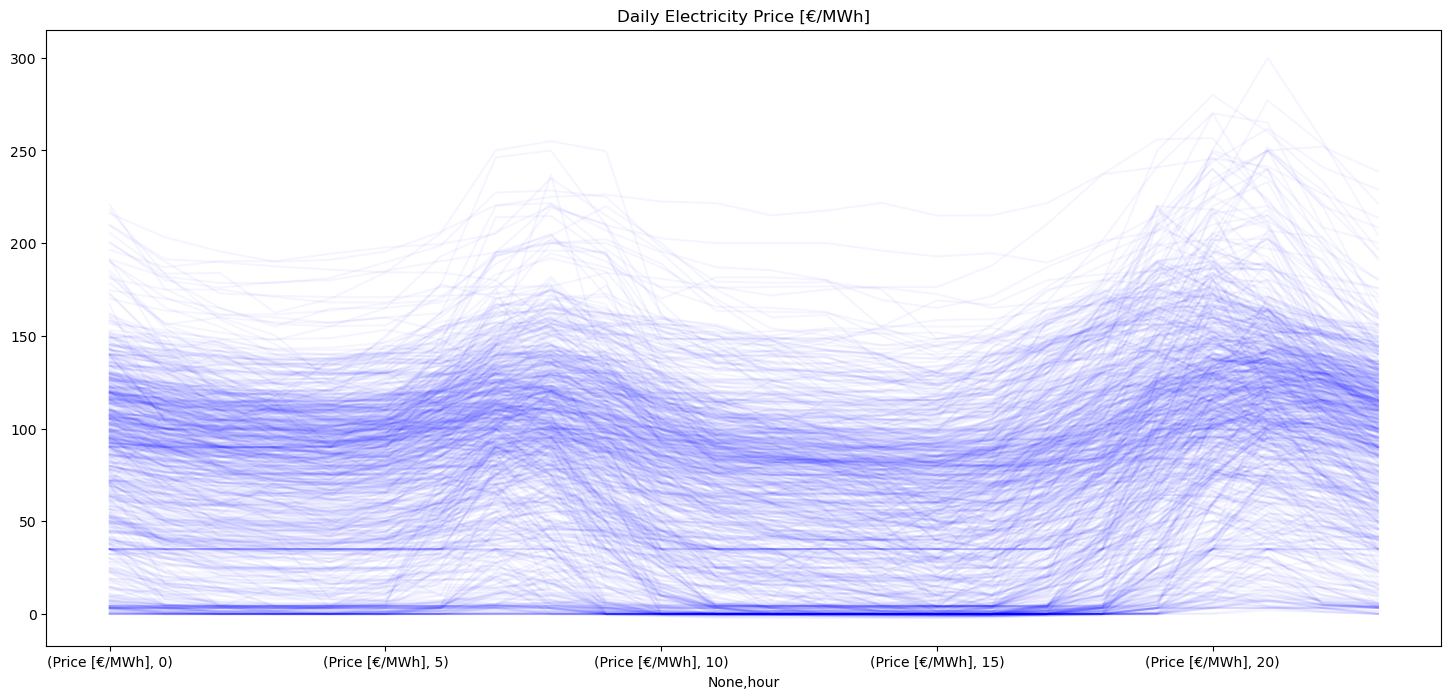

In [126]:
df_price_pivot.T.plot(figsize=(18, 8), title='Daily Electricity Price [€/MWh]', legend=False, color='blue', alpha=0.04)

**Transformation** 

The data is scaled using the *MinMaxScaler()* method

In [128]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = df_price_pivot.values.copy()
X_scaled = pd.DataFrame(scaler.fit_transform(X))
X_scaled.head()

0         1         2         3         4         5         6   \
0  0.906249  0.895576  0.913155  0.938301  0.932781  0.959282  0.963804   
1  0.713172  0.698686  0.704583  0.722830  0.709043  0.712797  0.683746   
2  0.679460  0.677329  0.634257  0.619035  0.700602  0.714062  0.737458   
3  0.909420  0.885783  0.900164  0.940719  0.926450  0.935761  0.923338   
4  0.978794  1.000000  1.000000  0.998528  0.983067  0.988973  1.000000   

        7         8         9   ...        14        15        16        17  \
0  0.90924  0.895686  0.901687  ...  0.791561  0.694329  0.699046  0.712816   
1  0.77272  0.784314  0.780673  ...  0.633141  0.608575  0.561126  0.547010   
2  0.59996  0.609569  0.552554  ...  0.366546  0.239742  0.118750  0.139257   
3  0.77996  0.801137  0.721845  ...  0.300210  0.190456  0.100917  0.099232   
4  0.88200  0.868627  0.828951  ...  0.622055  0.568188  0.567670  0.586137   

         18        19        20        21        22        23  
0  0.743383  0.820312  0.821452  0.832215  0.894923  0.801333  
1  0.549534  0.554609  0.695157  0.682114  0.625738  0.576349  
2  0.289555  0.373047  0.585328  0.687248  0.795592  0.653537  
3  0.339551  0.494375  0.731695  0.832215  0.987879  1.000000  
4  0.605075  0.772461  0.799807  0.922819  0.992523  0.928176  

[5 rows x 24 columns]

### Unsupervised Learning Model Building: Data Clustering using K-means

#### Optimal number of clusters: Silhouette Coefficient

In [133]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings("ignore")

silhouette_scores = []

# Evaluate the K-means algorithm for a range of [2,15] clusters. 
n_cluster_list = np.arange(2, 16).astype(int)

In [135]:
# Iteration to evaluate K-means for different number of clusters (n_clusters)
for n_cluster in n_cluster_list:
    kmeans = KMeans(n_clusters=n_cluster, random_state=0)
    cluster_found = kmeans.fit_predict(X_scaled)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_, random_state=0))

In [136]:
silhouette_scores

[0.4725324414177197,
 0.36488890129312673,
 0.3509298441910047,
 0.36997993291080034,
 0.3420340261822918,
 0.3144579476463924,
 0.2764723846170888,
 0.2855857979145525,
 0.254434632323934,
 0.25220916480513283,
 0.25677889796234854,
 0.25113997730574306,
 0.2534943460909876,
 0.24692447941965776]

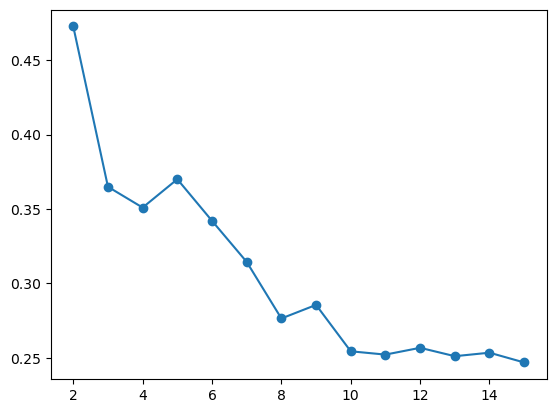

In [137]:
silhouette_metric = pd.DataFrame(index=n_cluster_list, columns=['silhouette_score'], data=silhouette_scores)
plt.plot(silhouette_metric, marker='o') 

In [138]:
# Train the K-means for the optimal number of clusters given the result of the Silhouette method.

kmeans = KMeans(n_clusters= 2, random_state=1990)  # write here the optimal number of clusters
cluster_found = kmeans.fit_predict(X_scaled)
cluster_found_sr = pd.Series(cluster_found, name='cluster')

In [141]:
# Create a multindex of the type: (date,cluster to which the day belongs)
df_price_pivot_clusters = df_price_pivot.set_index(cluster_found_sr, append=True)
df_price_pivot_clusters.index

MultiIndex([(2022-09-01, 1),
            (2022-09-02, 1),
            (2022-09-03, 1),
            (2022-09-04, 1),
            (2022-09-05, 1),
            (2022-09-06, 1),
            (2022-09-07, 1),
            (2022-09-08, 1),
            (2022-09-09, 1),
            (2022-09-10, 1),
            ...
            (2024-08-23, 1),
            (2024-08-24, 0),
            (2024-08-25, 0),
            (2024-08-26, 1),
            (2024-08-27, 1),
            (2024-08-28, 1),
            (2024-08-29, 1),
            (2024-08-30, 1),
            (2024-08-31, 1),
            (2024-09-01, 1)],
           names=[None, 'cluster'], length=730)

In [145]:
df_price_pivot_clusters.head(20)

Price [€/MWh]                                          \
hour                          0       1       2       3       4       5    
           cluster                                                         
2022-09-01 1              200.00  181.99  178.54  178.54  181.23  189.65   
2022-09-02 1              157.39  141.98  137.76  137.54  137.76  140.92   
2022-09-03 1              149.95  137.64  124.01  117.79  136.12  141.17   
2022-09-04 1              200.70  180.00  176.00  179.00  180.00  185.00   
2022-09-05 1              216.01  203.21  195.52  190.00  191.00  195.52   
2022-09-06 1              190.99  143.20  138.57  136.57  137.57  139.57   
2022-09-07 1              115.19  107.07   96.93   95.50   95.50   95.50   
2022-09-08 1              153.14  150.00  146.71  130.10  130.10  130.00   
2022-09-09 1              190.00  170.78  160.10  157.27  157.17  159.93   
2022-09-10 1              209.39  190.00  172.86  171.63  170.91  170.91   
2022-09-11 1              210.00  191.34  189.77  187.52  185.73  184.26   
2022-09-12 1              190.39  165.25  155.01  140.00  140.00  140.00   
2022-09-13 1              131.27  120.00  113.25  100.00   91.73   90.00   
2022-09-14 1              110.00  104.48   95.25   94.25   95.25  101.75   
2022-09-15 1              174.52  170.01  165.05  155.04  164.79  165.05   
2022-09-16 1              191.42  181.60  165.00  156.43  155.20  155.71   
2022-09-17 0               90.00   63.93   59.64   55.00   53.95   54.63   
2022-09-18 1              145.07  141.52  140.00  124.45  138.53  141.52   
2022-09-19 1              178.15  157.00  151.80  147.70  155.12  165.00   
2022-09-20 1              172.31  144.15  135.95  134.20  136.50  143.47   

                                                    ...                  \
hour                    6       7       8       9   ...      14      15   
           cluster                                  ...                   
2022-09-01 1        198.64  227.31  228.40  225.00  ...  175.08  148.60   
2022-09-02 1        140.92  193.18  200.00  194.72  ...  139.64  130.00   
2022-09-03 1        151.99  149.99  155.44  137.64  ...   80.00   50.00   
2022-09-04 1        190.30  194.99  204.29  180.00  ...   65.16   39.31   
2022-09-05 1        206.10  220.50  221.50  206.80  ...  137.16  121.24   
2022-09-06 1        145.37  213.95  214.69  193.51  ...  130.77  129.77   
2022-09-07 1        108.98  170.00  177.03  119.98  ...   53.94   50.10   
2022-09-08 1        137.90  161.60  175.06  162.12  ...  138.93  129.99   
2022-09-09 1        152.77  193.48  205.00  171.55  ...  121.04  119.58   
2022-09-10 1        171.63  172.86  171.63  165.20  ...  140.10  123.35   
2022-09-11 1        184.15  180.05  157.00  177.38  ...  100.20   99.50   
2022-09-12 1        162.25  188.87  204.00  220.00  ...  135.00  135.97   
2022-09-13 1        101.55  120.00  120.07  130.00  ...  109.68  110.00   
2022-09-14 1        109.21  130.00  153.05  153.05  ...  109.21  108.00   
2022-09-15 1        168.00  176.69  194.45  186.90  ...  176.09  172.50   
2022-09-16 1        171.00  192.83  201.36  190.13  ...  154.69  144.09   
2022-09-17 0         54.84   58.43   58.63   49.00  ...   30.10   30.00   
2022-09-18 1        146.50  157.46  150.61  140.00  ...   84.92   61.01   
2022-09-19 1        192.83  205.94  220.00  209.71  ...  196.00  192.83   
2022-09-20 1        160.00  183.17  191.85  184.74  ...  126.00  124.50   

                                                                            \
hour                    16      17      18      19      20      21      22   
           cluster                                                           
2022-09-01 1        149.70  157.68  176.12  210.00  230.01  250.00  228.40   
2022-09-02 1        119.77  120.77  129.98  141.98  194.65  205.27  160.00   
2022-09-03 1         23.77   30.00   68.10   95.50  163.90  206.80  203.16   
2022-09-04 1         19.90   21.09   80.00  126.56  204.88  250.00  252.02  

[0, 1]


Text(0.5, 0, 'Hours')

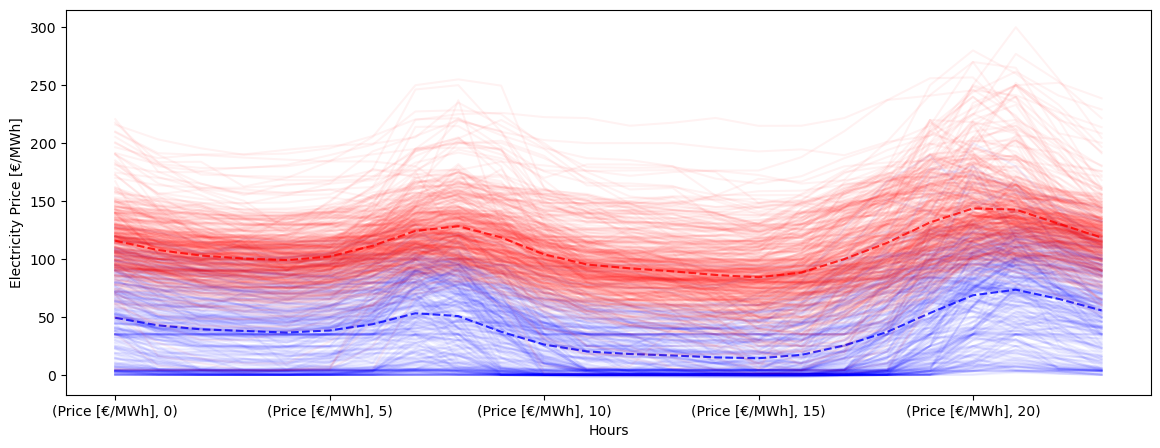

In [147]:
fig, ax = plt.subplots(1, 1, figsize=(14,5))
color_list = ['blue',  'red']
cluster_values = sorted(df_price_pivot_clusters.index.get_level_values('cluster').unique())
print(cluster_values)

for cluster, color in zip(cluster_values, color_list):
    # plot every line of both clusters
    df_price_pivot_clusters.xs(cluster, level=1).T.plot(ax=ax, legend=False, alpha=0.05, color=color)
    # plot the mean consumption of each cluster
    df_price_pivot_clusters.xs(cluster, level=1).mean().plot(ax=ax, color=color, legend=False, alpha=0.8, ls='--')

ax.set_ylabel('Electricity Price [€/MWh]')
ax.set_xlabel('Hours')

### Validating results with Dimensionality Reduction (PCA)

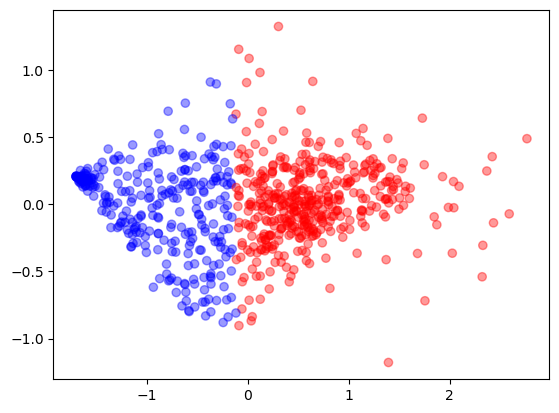

In [149]:
from sklearn.decomposition import PCA
import matplotlib.colors

pca = PCA(n_components=2, random_state=1990)
results_pca = pca.fit_transform(X_scaled)
cmap = matplotlib.colors.LinearSegmentedColormap.from_list(cluster_values, color_list)

plt.scatter(results_pca[:, 0], results_pca[:, 1],
            c=df_price_pivot_clusters.index.get_level_values('cluster'),
            cmap=cmap,
            alpha=0.4,
            )
plt.show()

In [151]:
results_pca

array([[ 2.43471845, -0.13839244],
       [ 1.54343256, -0.00834782],
       [ 0.81492899, -0.62588685],
       ...,
       [ 0.78161039, -0.07419176],
       [ 0.79807956, -0.16816015],
       [ 0.42865615, -0.53453439]])

#### Optimal number of clusters: Elbow Method

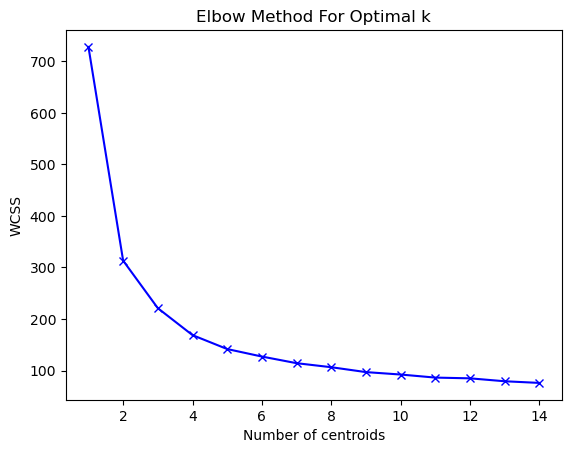

In [155]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import time

wcss = []
K = range(1,15)

for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X_scaled)
    wcss.append(km.inertia_)
    


# Plot the Elbow
plt.plot(K, wcss, 'bx-')
plt.xlabel('Number of centroids')
plt.ylabel('WCSS')
plt.title('Elbow Method For Optimal k')
plt.show()

In [156]:
kmeans = KMeans(n_clusters= 3, random_state=1990)  # write here the optimal number of clusters
cluster_found = kmeans.fit_predict(X_scaled)
cluster_found_sr = pd.Series(cluster_found, name='cluster')

In [157]:
# Create a multindex of the type: (date,cluster to which the day belongs)
df_price_pivot_clusters_elbow = df_price_pivot.set_index(cluster_found_sr, append=True)
df_price_pivot_clusters_elbow.index

MultiIndex([(2022-09-01, 1),
            (2022-09-02, 1),
            (2022-09-03, 1),
            (2022-09-04, 1),
            (2022-09-05, 1),
            (2022-09-06, 1),
            (2022-09-07, 2),
            (2022-09-08, 1),
            (2022-09-09, 1),
            (2022-09-10, 1),
            ...
            (2024-08-23, 2),
            (2024-08-24, 2),
            (2024-08-25, 0),
            (2024-08-26, 2),
            (2024-08-27, 2),
            (2024-08-28, 2),
            (2024-08-29, 1),
            (2024-08-30, 1),
            (2024-08-31, 1),
            (2024-09-01, 2)],
           names=[None, 'cluster'], length=730)

[0, 1, 2]


Text(0.5, 0, 'Hours')

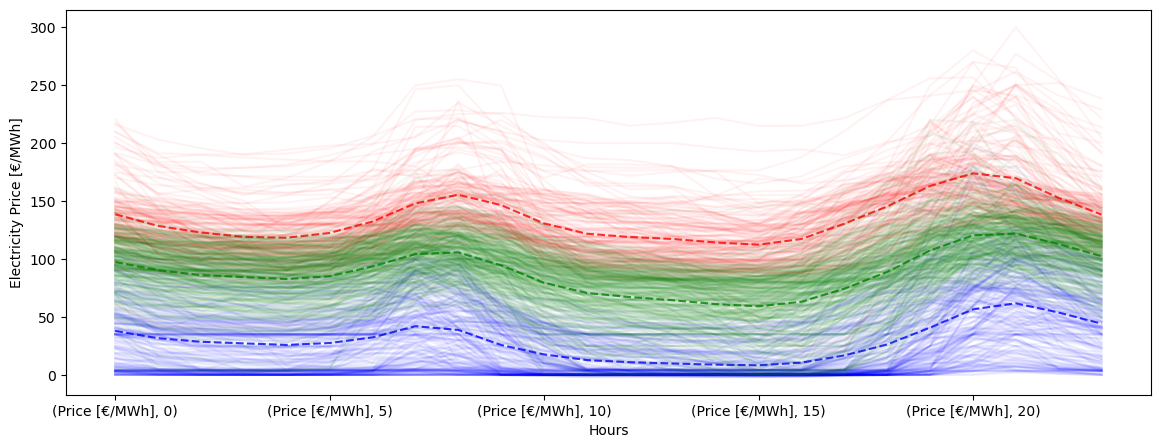

In [158]:
fig, ax = plt.subplots(1, 1, figsize=(14,5))
color_list = ['blue',  'red', 'green']
cluster_values = sorted(df_price_pivot_clusters_elbow.index.get_level_values('cluster').unique())
print(cluster_values)

for cluster, color in zip(cluster_values, color_list):
    # plot every line of both clusters
    df_price_pivot_clusters_elbow.xs(cluster, level=1).T.plot(ax=ax, legend=False, alpha=0.05, color=color)
    # plot the mean consumption of each cluster
    df_price_pivot_clusters_elbow.xs(cluster, level=1).mean().plot(ax=ax, color=color, legend=False, alpha=0.8, ls='--')

ax.set_ylabel('Electricity Price [€/MWh]')
ax.set_xlabel('Hours')

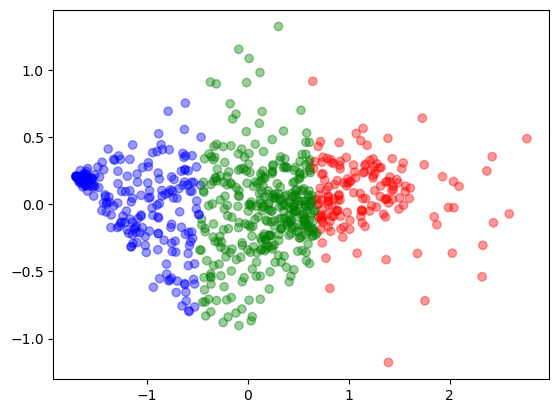

In [162]:
from sklearn.decomposition import PCA
import matplotlib.colors

pca = PCA(n_components=2, random_state=1990)
results_pca = pca.fit_transform(X_scaled)
cmap = matplotlib.colors.LinearSegmentedColormap.from_list(cluster_values, color_list)

plt.scatter(results_pca[:, 0], results_pca[:, 1],
            c=df_price_pivot_clusters_elbow.index.get_level_values('cluster'),
            cmap=cmap,
            alpha=0.4,
            )
plt.show()